# **Modelo Predictivo de Bitcoin**

# Importando Librerias





In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#Librería para gráficos de vela
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

# Lectura del DataFrame

In [288]:
df_original = pd.read_csv(r"C:\PythonProjects\IA-TalentoTech\Proyecto\BTCUSD_1m_Binance.csv")
df = df_original.copy()
df

Open time       Open       High        Low      Close  \
0        2017-08-17 04:00:00    4261.48    4261.48    4261.48    4261.48   
1        2017-08-17 04:01:00    4261.48    4261.48    4261.48    4261.48   
2        2017-08-17 04:02:00    4280.56    4280.56    4280.56    4280.56   
3        2017-08-17 04:03:00    4261.48    4261.48    4261.48    4261.48   
4        2017-08-17 04:04:00    4261.48    4261.48    4261.48    4261.48   
...                      ...        ...        ...        ...        ...   
4150713  2025-07-14 14:25:00  121425.97  121455.08  121276.00  121284.09   
4150714  2025-07-14 14:26:00  121284.08  121378.63  121277.24  121364.28   
4150715  2025-07-14 14:27:00  121364.28  121364.28  121150.00  121223.75   
4150716  2025-07-14 14:28:00  121223.75  121341.27  121161.15  121341.26   
4150717  2025-07-14 14:29:00  121341.26  121422.28  121336.11  121422.28   

            Volume               Close time  Quote asset volume  \
0         1.775183  2017-08-17 04:00:59.999        7.564907e+03   
1         0.000000  2017-08-17 04:01:59.999        0.000000e+00   
2         0.261074  2017-08-17 04:02:59.999        1.117543e+03   
3         0.012008  2017-08-17 04:03:59.999        5.117185e+01   
4         0.140796  2017-08-17 04:04:59.999        5.999993e+02   
...            ...                      ...                 ...   
4150713  21.290530  2025-07-14 14:25:59.999        2.583209e+06   
4150714  14.175090  2025-07-14 14:26:59.999        1.719695e+06   
4150715  34.727350  2025-07-14 14:27:59.999        4.209330e+06   
4150716  17.530140  2025-07-14 14:28:59.999        2.125081e+06   
4150717   4.158170  2025-07-14 14:29:59.999        5.047320e+05   

         Number of trades  Taker buy base asset volume  \
0                     3.0                     0.075183   
1                     0.0                     0.000000   
2                     2.0                     0.261074   
3                     3.0                     0.012008   
4                     1.0                     0.140796   
...                   ...                          ...   
4150713            5099.0                     3.914260   
4150714            4871.0                     7.662750   
4150715            8506.0                    10.703310   
4150716            5349.0                    12.258100   
4150717            1666.0                     3.760610   

         Taker buy quote asset volume  Ignore  
0                        3.203909e+02     0.0  
1                        0.000000e+00     0.0  
2                        1.117543e+03     0.0  
3                        5.117185e+01     0.0  
4                        5.999993e+02     0.0  
...                               ...     ...  
4150713                  4.750087e+05     0.0  
4150714                  9.296082e+05     0.0  
4150715                  1.297333e+06     0.0  
4150716                  1.486076e+06     0.0  
4150717                  4.564890e+05     0.0  

[4150718 rows x 12 columns]

# Análisis exploratorio de los datos

In [289]:
#Verificando cantidad de datos nulos
df.isnull().sum()

Open time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
Ignore                          0
dtype: int64

In [290]:
#Verificando cantidad de datos duplicados
df.duplicated().sum()

np.int64(0)

In [291]:
# Descripcion Estadistica
df.describe().T

count          mean           std     min  \
Open                          4150718.0  3.176283e+04  2.771614e+04  2830.0   
High                          4150718.0  3.177800e+04  2.772572e+04  2830.0   
Low                           4150718.0  3.174752e+04  2.770654e+04  2817.0   
Close                         4150718.0  3.176285e+04  2.771618e+04  2817.0   
Volume                        4150718.0  4.530445e+01  8.793066e+01     0.0   
Quote asset volume            4150718.0  1.221377e+06  2.381097e+06     0.0   
Number of trades              4150718.0  1.225100e+03  2.038555e+03     0.0   
Taker buy base asset volume   4150718.0  2.251193e+01  4.485121e+01     0.0   
Taker buy quote asset volume  4150718.0  6.040247e+05  1.241867e+06     0.0   
Ignore                        4150718.0  0.000000e+00  0.000000e+00     0.0   

                                        25%            50%           75%  \
Open                            8843.970000   22997.830000  4.723737e+04   
High                            8849.662500   23007.230000  4.726501e+04   
Low                             8838.000000   22987.925000  4.721000e+04   
Close                           8843.860000   22997.830000  4.723733e+04   
Volume                             9.165850      20.065885  4.505875e+01   
Quote asset volume            148416.369507  474011.954304  1.357392e+06   
Number of trades                 204.000000     539.000000  1.322000e+03   
Taker buy base asset volume        4.026020       9.584390  2.249240e+01   
Taker buy quote asset volume   62778.388329  215188.972320  6.596928e+05   
Ignore                             0.000000       0.000000  0.000000e+00   

                                       max  
Open                          1.231863e+05  
High                          1.232180e+05  
Low                           1.229940e+05  
Close                         1.231863e+05  
Volume                        5.877775e+03  
Quote asset volume            2.598501e+08  
Number of trades              1.497130e+05  
Taker buy base asset volume   3.537453e+03  
Taker buy quote asset volume  1.482314e+08  
Ignore                        0.000000e+00

In [292]:
# Columnas del dataset
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume', 'Ignore'],
      dtype='object')

In [293]:
# Tamaño del dataset
df.shape

(4150718, 12)

In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150718 entries, 0 to 4150717
Data columns (total 12 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Open time                     object 
 1   Open                          float64
 2   High                          float64
 3   Low                           float64
 4   Close                         float64
 5   Volume                        float64
 6   Close time                    object 
 7   Quote asset volume            float64
 8   Number of trades              float64
 9   Taker buy base asset volume   float64
 10  Taker buy quote asset volume  float64
 11  Ignore                        float64
dtypes: float64(10), object(2)
memory usage: 380.0+ MB


# Limpieza de datos

Eliminación de columnas innecesarias

In [295]:
df.drop(columns=["Ignore", "Close time"], inplace=True)
df.columns

Index(['Open time', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Quote asset volume', 'Number of trades', 'Taker buy base asset volume',
       'Taker buy quote asset volume'],
      dtype='object')

### Creación y conversión de datos en nuevas columnas (date y hour)

In [296]:
# Convertir a datetime
df["Datetime"] = pd.to_datetime(df["Open time"])

# Extraer fecha y hora
df["Date"] = df["Datetime"].dt.date
df["Hour"] = df["Datetime"].dt.hour

# Convertir Date a datetime64
df["Date"] = pd.to_datetime(df["Date"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150718 entries, 0 to 4150717
Data columns (total 13 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Open time                     object        
 1   Open                          float64       
 2   High                          float64       
 3   Low                           float64       
 4   Close                         float64       
 5   Volume                        float64       
 6   Quote asset volume            float64       
 7   Number of trades              float64       
 8   Taker buy base asset volume   float64       
 9   Taker buy quote asset volume  float64       
 10  Datetime                      datetime64[ns]
 11  Date                          datetime64[ns]
 12  Hour                          int32         
dtypes: datetime64[ns](2), float64(9), int32(1), object(1)
memory usage: 395.8+ MB


### Límite de registros

El dataset se está actualizando constantemente, por lo que esto es una medida de estandarización para evaluar los resultados

In [297]:
df = df[df['Date'] <= pd.Timestamp(dt.date(year=2025, month=6, day=30))]

In [298]:
df

Open time       Open       High        Low      Close  \
0        2017-08-17 04:00:00    4261.48    4261.48    4261.48    4261.48   
1        2017-08-17 04:01:00    4261.48    4261.48    4261.48    4261.48   
2        2017-08-17 04:02:00    4280.56    4280.56    4280.56    4280.56   
3        2017-08-17 04:03:00    4261.48    4261.48    4261.48    4261.48   
4        2017-08-17 04:04:00    4261.48    4261.48    4261.48    4261.48   
...                      ...        ...        ...        ...        ...   
4131123  2025-06-30 23:55:00  107104.12  107104.12  107093.34  107093.34   
4131124  2025-06-30 23:56:00  107093.35  107093.35  107071.64  107071.65   
4131125  2025-06-30 23:57:00  107071.64  107086.00  107071.64  107085.99   
4131126  2025-06-30 23:58:00  107085.99  107140.00  107085.99  107139.99   
4131127  2025-06-30 23:59:00  107140.00  107176.24  107139.99  107146.50   

            Volume  Quote asset volume  Number of trades  \
0         1.775183        7.564907e+03               3.0   
1         0.000000        0.000000e+00               0.0   
2         0.261074        1.117543e+03               2.0   
3         0.012008        5.117185e+01               3.0   
4         0.140796        5.999993e+02               1.0   
...            ...                 ...               ...   
4131123   1.489080        1.594723e+05             370.0   
4131124   1.729470        1.852058e+05             591.0   
4131125   5.136420        5.500011e+05             516.0   
4131126  14.187840        1.519565e+06            2001.0   
4131127  18.781830        2.012882e+06            2024.0   

         Taker buy base asset volume  Taker buy quote asset volume  \
0                           0.075183                  3.203909e+02   
1                           0.000000                  0.000000e+00   
2                           0.261074                  1.117543e+03   
3                           0.012008                  5.117185e+01   
4                           0.140796                  5.999993e+02   
...                              ...                           ...   
4131123                     1.046640                  1.120883e+05   
4131124                     0.200040                  2.142194e+04   
4131125                     2.935670                  3.143323e+05   
4131126                    13.914420                  1.490284e+06   
4131127                    14.641330                  1.569168e+06   

                   Datetime       Date  Hour  
0       2017-08-17 04:00:00 2017-08-17     4  
1       2017-08-17 04:01:00 2017-08-17     4  
2       2017-08-17 04:02:00 2017-08-17     4  
3       2017-08-17 04:03:00 2017-08-17     4  
4       2017-08-17 04:04:00 2017-08-17     4  
...                     ...        ...   ...  
4131123 2025-06-30 23:55:00 2025-06-30    23  
4131124 2025-06-30 23:56:00 2025-06-30    23  
4131125 2025-06-30 23:57:00 2025-06-30    23  
4131126 2025-06-30 23:58:00 2025-06-30    23  
4131127 2025-06-30 23:59:00 2025-06-30    23  

[4131128 rows x 13 columns]

### Reducciendo columnas y agrupando por día y hora

In [299]:
# Agrupar por Date y Hour
df_hora = df.groupby(["Date", "Hour"]).agg(
    open=("Open", "first"),
    high=("High", "max"),
    low=("Low", "min"),
    close=("Close", "last"),
    volume=("Volume", "sum"),
    quote_asset_volume=("Quote asset volume", "sum"),
    number_of_trades=("Number of trades", "sum"),
    taker_buy_base_asset_volume=("Taker buy base asset volume", "sum"),
    taker_buy_quote_asset_volume=("Taker buy quote asset volume", "sum")
)

# Resetear índice
df_hora = df_hora.reset_index()

df_hora

Date  Hour       open       high        low      close  \
0     2017-08-17     4    4261.48    4313.62    4261.32    4308.83   
1     2017-08-17     5    4308.83    4328.69    4291.37    4315.32   
2     2017-08-17     6    4315.32    4345.45    4309.37    4324.35   
3     2017-08-17     7    4324.35    4349.99    4287.41    4349.99   
4     2017-08-17     8    4333.32    4377.85    4333.32    4360.69   
...          ...   ...        ...        ...        ...        ...   
68863 2025-06-30    19  107242.00  107794.19  107212.60  107745.97   
68864 2025-06-30    20  107745.97  107764.73  107480.00  107577.89   
68865 2025-06-30    21  107577.88  107589.00  106900.02  107130.81   
68866 2025-06-30    22  107130.80  107317.53  107029.64  107112.75   
68867 2025-06-30    23  107112.76  107232.59  107063.04  107146.50   

           volume  quote_asset_volume  number_of_trades  \
0       47.181009        2.023661e+05             171.0   
1       23.234916        1.003048e+05             102.0   
2        7.229691        3.128231e+04              36.0   
3        4.443249        1.924106e+04              25.0   
4        0.972807        4.239504e+03              28.0   
...           ...                 ...               ...   
68863  325.038380        3.494657e+07           71715.0   
68864  187.168190        2.013920e+07           49798.0   
68865  441.728720        4.737217e+07           61097.0   
68866  203.265000        2.178984e+07           59272.0   
68867  239.453500        2.565181e+07           45040.0   

       taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
0                        35.160503                  1.509525e+05  
1                        21.448071                  9.260828e+04  
2                         4.802861                  2.079532e+04  
3                         2.602292                  1.129135e+04  
4                         0.814655                  3.552747e+03  
...                            ...                           ...  
68863                   194.530860                  2.091631e+07  
68864                    81.445960                  8.763359e+06  
68865                   114.763930                  1.230459e+07  
68866                   101.822900                  1.091597e+07  
68867                   129.320960                  1.385352e+07  

[68868 rows x 11 columns]

In [300]:
df_hora["Datetime"] = pd.to_datetime(df_hora["Date"]) + pd.to_timedelta(df_hora["Hour"], unit="h")
df_hora.set_index("Datetime", inplace=True)
df_hora

Date  Hour       open       high        low  \
Datetime                                                                
2017-08-17 04:00:00 2017-08-17     4    4261.48    4313.62    4261.32   
2017-08-17 05:00:00 2017-08-17     5    4308.83    4328.69    4291.37   
2017-08-17 06:00:00 2017-08-17     6    4315.32    4345.45    4309.37   
2017-08-17 07:00:00 2017-08-17     7    4324.35    4349.99    4287.41   
2017-08-17 08:00:00 2017-08-17     8    4333.32    4377.85    4333.32   
...                        ...   ...        ...        ...        ...   
2025-06-30 19:00:00 2025-06-30    19  107242.00  107794.19  107212.60   
2025-06-30 20:00:00 2025-06-30    20  107745.97  107764.73  107480.00   
2025-06-30 21:00:00 2025-06-30    21  107577.88  107589.00  106900.02   
2025-06-30 22:00:00 2025-06-30    22  107130.80  107317.53  107029.64   
2025-06-30 23:00:00 2025-06-30    23  107112.76  107232.59  107063.04   

                         close      volume  quote_asset_volume  \
Datetime                                                         
2017-08-17 04:00:00    4308.83   47.181009        2.023661e+05   
2017-08-17 05:00:00    4315.32   23.234916        1.003048e+05   
2017-08-17 06:00:00    4324.35    7.229691        3.128231e+04   
2017-08-17 07:00:00    4349.99    4.443249        1.924106e+04   
2017-08-17 08:00:00    4360.69    0.972807        4.239504e+03   
...                        ...         ...                 ...   
2025-06-30 19:00:00  107745.97  325.038380        3.494657e+07   
2025-06-30 20:00:00  107577.89  187.168190        2.013920e+07   
2025-06-30 21:00:00  107130.81  441.728720        4.737217e+07   
2025-06-30 22:00:00  107112.75  203.265000        2.178984e+07   
2025-06-30 23:00:00  107146.50  239.453500        2.565181e+07   

                     number_of_trades  taker_buy_base_asset_volume  \
Datetime                                                             
2017-08-17 04:00:00             171.0                    35.160503   
2017-08-17 05:00:00             102.0                    21.448071   
2017-08-17 06:00:00              36.0                     4.802861   
2017-08-17 07:00:00              25.0                     2.602292   
2017-08-17 08:00:00              28.0                     0.814655   
...                               ...                          ...   
2025-06-30 19:00:00           71715.0                   194.530860   
2025-06-30 20:00:00           49798.0                    81.445960   
2025-06-30 21:00:00           61097.0                   114.763930   
2025-06-30 22:00:00           59272.0                   101.822900   
2025-06-30 23:00:00           45040.0                   129.320960   

                     taker_buy_quote_asset_volume  
Datetime                                           
2017-08-17 04:00:00                  1.509525e+05  
2017-08-17 05:00:00                  9.260828e+04  
2017-08-17 06:00:00                  2.079532e+04  
2017-08-17 07:00:00                  1.129135e+04  
2017-08-17 08:00:00                  3.552747e+03  
...                                           ...  
2025-06-30 19:00:00                  2.091631e+07  
2025-06-30 20:00:00                  8.763359e+06  
2025-06-30 21:00:00                  1.230459e+07  
2025-06-30 22:00:00                  1.091597e+07  
2025-06-30 23:00:00                  1.385352e+07  

[68868 rows x 11 columns]

### **Renombrar las columnas**

In [301]:
df_hora = df_hora.rename(columns={'Date': 'date',
                        'Hour': 'hour',
                        'Open': 'open',
                        'High': 'high',
                        'Low': 'low',
                        'Close': 'close',
                        'Volume': 'volume',
                        'Quote asset volume': 'quote_asset_volume',
                        'Number of trades': 'number_of_trades',
                        'Taker buy base asset volume':'taker_buy_base_asset_volume',
                        'Taker buy quote asset volume': 'taker_buy_quote_asset_volume'})

Horas sin volume

In [302]:
df_hora[df_hora["volume"]==0]

date  hour      open      high       low     close  \
Datetime                                                                       
2017-09-06 16:00:00 2017-09-06    16   4619.43   4619.43   4619.43   4619.43   
2019-06-07 21:00:00 2019-06-07    21   7930.85   7930.85   7930.85   7930.85   
2021-02-11 03:00:00 2021-02-11     3  44582.07  44582.07  44582.07  44582.07   
2023-03-24 12:00:00 2023-03-24    12  28080.00  28080.00  28080.00  28080.00   

                     volume  quote_asset_volume  number_of_trades  \
Datetime                                                            
2017-09-06 16:00:00     0.0                 0.0               0.0   
2019-06-07 21:00:00     0.0                 0.0               0.0   
2021-02-11 03:00:00     0.0                 0.0               0.0   
2023-03-24 12:00:00     0.0                 0.0               0.0   

                     taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
Datetime                                                                        
2017-09-06 16:00:00                          0.0                           0.0  
2019-06-07 21:00:00                          0.0                           0.0  
2021-02-11 03:00:00                          0.0                           0.0  
2023-03-24 12:00:00                          0.0                           0.0

### **Descripción de columnas actuales:**

- date: Fecha del registro
- hour: Hora en que se realizó el registro
- open: Es el precio al que comienza a cotizar el activo al inicio del período
- high: Es el precio más alto alcanzado por el activo durante ese período
- low: Es el precio más bajo alcanzado por el activo durante ese período
- close: Es el precio al que cierra la cotización del activo al final del período
- volume: cantidad de transacciones realizadas del bitcoin
- quote_asset_volume:  la cantidad de dólares (USD) que se han intercambiado por Bitcoin (BTC) en un período determinado.
- number_of_trades: cantidad de traders que realizaron las transacciones en dicho período
- taker_buy_base_asset_volume: Este indicador específico muestra la suma de todas las órdenes de compra de la base asset ejecutadas por takers
- taker_buy_quote_asset_volume: indicador que muestra la suma de las órdenes de compra en dólares (USD).

# Feature Engineering

### Retorno Logarítmico

 predecir log-returns es habitual y efectivo en criptomonedas y otros activos financieros. es una forma de medir el cambio porcentual en el valor de un activo a lo largo del tiempo.

In [303]:
df_hora["log_return"] = np.log(df_hora["close"] / df_hora["close"].shift(1))

### SMA y EMA

- Media móvil simple (sma): Calcula el precio promedio sumando los precios de cierre de un período específico y dividiendo por el número de períodos
- media móvil exponencial (EMA): Da una mayor ponderación a los precios recientes. Como la EMA da más peso a los datos actuales que a los antiguos, es más reactiva a los últimos cambios de precios que la SMA. Por este motivo, algunos traders prefieren este tipo de media móvil.

In [304]:
df_hora["sma_3"] = df_hora["close"].rolling(window=3).mean() #Media movil simple ultimas 3 horas del precio de cierre
df_hora["sma_6"] = df_hora["close"].rolling(window=6).mean() # media movil simple ultimas 6 horas del precio de cierre
df_hora["ema_3"] = df_hora["close"].ewm(span=3, adjust=False).mean() # media movil exponencial ultimas 3 horas del precio de cierre
df_hora["ema_6"] = df_hora["close"].ewm(span=6, adjust=False).mean() # Media movil exponencial ultimas 6 horas del precio de cierre

### MACD (Moving Average Convergence Divergence - Convergencia Divergencia de Media Móvil)

- El MACD se calcula restando la EMA (media móvil exponencial) de 26 períodos de la EMA de 12 períodos. Adicionalmente, se utiliza una "línea de señal", que es una EMA de 9 períodos de la línea MACD. Estos tres componentes (línea MACD, línea de señal y el histograma) ayudan a los traders a evaluar el impulso del mercado y detectar posibles señales de compra o venta.

El MACD no tiene un rango absoluto. Otros indicadores osciladores tienen un rango máximo y mínimo, por lo que son adecuados para definir las condiciones de sobrecompra y sobreventa de un activo. Sin embargo, el MACD es inadecuado para un cálculo de este tipo, ya que su valor no se limita a un rango

**Cómo leer el MACD:**
- **Línea MACD :** Se calcula utilizando la fórmula antes mencionada, donde 26-EMA se resta de 12-EMA
- **Línea de señales :** es una EMA de 9 periodos por defecto. El cruce de la línea MACD y la línea de señal se utiliza para encontrar convergencias, divergencias y señales de trading. Puede combinarlas para encontrar niveles de entrada y salida o puntos de inversión.  
- **Línea cero :** La línea recta cero representa que el MACD es igual a cero aquí. Significa que la 26-EMA y la 12-EMA son ambas iguales
- **Histograma:** simboliza la diferencia entre las líneas de señal y MACD. El histograma es positivo cuando la línea MACD está por encima de la línea de señal y negativo cuando la línea de señal está por encima de la línea MACD. Un histograma es una representación gráfica de la convergencia y divergencia de las líneas MACD y de señal.

In [305]:
ema_12 = df_hora["close"].ewm(span=12, adjust=False).mean() #Media movil simple ultimas 12 horas del precio de cierre
ema_26 = df_hora["close"].ewm(span=26, adjust=False).mean() #Media movil simple ultimas 26 horas del precio de cierre
df_hora["macd"] = ema_12 - ema_26
df_hora["macd_signal"] = df_hora["macd"].ewm(span=9, adjust=False).mean() #Linea de señal
df_hora["macd_hist"] = df_hora["macd"] - df_hora["macd_signal"]

### RSI (Relative Strength Index)

RSI proporciona un valor entre 0 y 100. Cualquier valor por debajo de 30 se considera sobreventa, y por encima de 70 se considera sobrecompra. Si el RSI está por encima de 70, la criptodivisa está sobrecomprada y es posible que se produzca un cambio de tendencia, lo que supondría una oportunidad de venta. Del mismo modo, si el RSI cae por debajo de 30, la criptomoneda dada ha sido sobrevendida, y una oportunidad de compra espera.

In [306]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_hora["rsi_14"] = compute_rsi(df_hora["close"], period=14)

### Bandas de Bollinger

 Mide la volatilidad y la acción del precio de un activo. Consisten en tres líneas: una media móvil simple (SMA) y dos bandas, una superior y otra inferior, que se sitúan a una distancia de desviaciones estándar de la SMA. Estas bandas se ensanchan o contraen según la volatilidad del mercado, lo que ayuda a los operadores a identificar posibles oportunidades de compra o venta

In [307]:
rolling_mean = df_hora["close"].rolling(window=20).mean()
rolling_std = df_hora["close"].rolling(window=20).std()
df_hora["bb_middle"] = rolling_mean
df_hora["bb_upper"] = rolling_mean + (2 * rolling_std)
df_hora["bb_lower"] = rolling_mean - (2 * rolling_std)

### ATR (Average True Range)

Muestra el rango promedio de movimiento de precios durante un período determinado, generalmente 14 días. Un ATR alto indica mayor volatilidad, mientras que un ATR bajo sugiere menor volatilidad. Los traders utilizan el ATR para establecer niveles de stop-loss y evaluar el tamaño de las posiciones, ayudando a gestionar el riesgo de manera efectiva en el mercado de criptomonedas



In [308]:
high_low = df_hora["high"] - df_hora["low"]
high_close = np.abs(df_hora["high"] - df_hora["close"].shift())
low_close = np.abs(df_hora["low"] - df_hora["close"].shift())
true_range = pd.concat([high_low, high_close, low_close], axis=1).max(axis=1)
df_hora["atr_14"] = true_range.rolling(window=14).mean()

### Buy Pressure (Presión Compradora)

 indicador de la fuerza con la que los compradores están impulsando el precio de un activo digital al alza. Cuando hay más compradores que vendedores, se dice que hay presión de compra, lo que a menudo lleva a un aumento en el precio.

In [309]:
df_hora["buy_pressure"] = df_hora["taker_buy_base_asset_volume"] / df_hora["volume"]

### Rango y Cuerpo de la Vela
En los gráficos de velas de criptomonedas, el "cuerpo" representa la diferencia entre los precios de apertura y cierre de un activo durante un período específico, mientras que las "mechas" o "sombras" muestran los precios máximos y mínimos alcanzados en ese mismo período

In [310]:
df_hora["range"] = df_hora["high"] - df_hora["low"]
df_hora["body"] = np.abs(df_hora["close"] - df_hora["open"])

### Características temporales

In [311]:
df_hora["day_of_week"] = df_hora.index.dayofweek
df_hora["month"] = df_hora.index.month
df_hora["year"] = df_hora.index.year

In [312]:
df_hora.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68868 entries, 2017-08-17 04:00:00 to 2025-06-30 23:00:00
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   date                          68868 non-null  datetime64[ns]
 1   hour                          68868 non-null  int32         
 2   open                          68868 non-null  float64       
 3   high                          68868 non-null  float64       
 4   low                           68868 non-null  float64       
 5   close                         68868 non-null  float64       
 6   volume                        68868 non-null  float64       
 7   quote_asset_volume            68868 non-null  float64       
 8   number_of_trades              68868 non-null  float64       
 9   taker_buy_base_asset_volume   68868 non-null  float64       
 10  taker_buy_quote_asset_volume  68868 non-null  float64      

### Buscando y entendiendo los registros nulos

# Imputación de Datos

In [313]:
df_hora.isnull().sum()

date                             0
hour                             0
open                             0
high                             0
low                              0
close                            0
volume                           0
quote_asset_volume               0
number_of_trades                 0
taker_buy_base_asset_volume      0
taker_buy_quote_asset_volume     0
log_return                       1
sma_3                            2
sma_6                            5
ema_3                            0
ema_6                            0
macd                             0
macd_signal                      0
macd_hist                        0
rsi_14                          13
bb_middle                       19
bb_upper                        19
bb_lower                        19
atr_14                          13
buy_pressure                     4
range                            0
body                             0
day_of_week                      0
month               

In [314]:
df_hora[df_hora.isnull().any(axis=1)]

date  hour      open      high       low     close  \
Datetime                                                                       
2017-08-17 04:00:00 2017-08-17     4   4261.48   4313.62   4261.32   4308.83   
2017-08-17 05:00:00 2017-08-17     5   4308.83   4328.69   4291.37   4315.32   
2017-08-17 06:00:00 2017-08-17     6   4315.32   4345.45   4309.37   4324.35   
2017-08-17 07:00:00 2017-08-17     7   4324.35   4349.99   4287.41   4349.99   
2017-08-17 08:00:00 2017-08-17     8   4333.32   4377.85   4333.32   4360.69   
2017-08-17 09:00:00 2017-08-17     9   4360.69   4445.78   4360.00   4444.00   
2017-08-17 10:00:00 2017-08-17    10   4441.10   4470.00   4399.81   4460.00   
2017-08-17 11:00:00 2017-08-17    11   4460.00   4485.39   4427.30   4427.30   
2017-08-17 12:00:00 2017-08-17    12   4427.30   4449.56   4411.00   4411.00   
2017-08-17 13:00:00 2017-08-17    13   4411.00   4459.00   4411.00   4459.00   
2017-08-17 14:00:00 2017-08-17    14   4459.00   4485.39   4435.93   4470.82   
2017-08-17 15:00:00 2017-08-17    15   4470.82   4470.82   4333.42   4352.34   
2017-08-17 16:00:00 2017-08-17    16   4352.34   4354.35   4255.30   4354.18   
2017-08-17 17:00:00 2017-08-17    17   4354.18   4354.84   4235.45   4289.24   
2017-08-17 18:00:00 2017-08-17    18   4289.24   4302.45   4218.68   4256.97   
2017-08-17 19:00:00 2017-08-17    19   4241.91   4335.30   4200.74   4325.23   
2017-08-17 20:00:00 2017-08-17    20   4307.56   4354.84   4258.56   4346.74   
2017-08-17 21:00:00 2017-08-17    21   4346.74   4369.69   4309.23   4333.55   
2017-08-17 22:00:00 2017-08-17    22   4333.55   4359.13   4310.00   4336.80   
2017-09-06 16:00:00 2017-09-06    16   4619.43   4619.43   4619.43   4619.43   
2019-06-07 21:00:00 2019-06-07    21   7930.85   7930.85   7930.85   7930.85   
2021-02-11 03:00:00 2021-02-11     3  44582.07  44582.07  44582.07  44582.07   
2023-03-24 12:00:00 2023-03-24    12  28080.00  28080.00  28080.00  28080.00   

                        volume  quote_asset_volume  number_of_trades  \
Datetime                                                               
2017-08-17 04:00:00  47.181009       202366.138393             171.0   
2017-08-17 05:00:00  23.234916       100304.823567             102.0   
2017-08-17 06:00:00   7.229691        31282.312670              36.0   
2017-08-17 07:00:00   4.443249        19241.058300              25.0   
2017-08-17 08:00:00   0.972807         4239.503586              28.0   
2017-08-17 09:00:00  10.763623        47219.355944              43.0   
2017-08-17 10:00:00  24.865399       110290.728988              82.0   
2017-08-17 11:00:00  27.018053       120751.569232              95.0   
2017-08-17 12:00:00  23.032398       102126.518585             108.0   
2017-08-17 13:00:00  31.312436       138976.639435             118.0   
2017-08-17 14:00:00  51.735897       230871.453366             234.0   
2017-08-17 15:00:00  68.481270       302264.186931             398.0   
2017-08-17 16:00:00  67.458791       290623.450483             398.0   
2017-08-17 17:00:00  59.664912       256886.352590             192.0   
2017-08-17 18:00:00  51.275163       218259.358820             194.0   
2017-08-17 19:00:00  46.710850       199521.936911             202.0   
2017-08-17 20:00:00  48.975472       210548.880923             247.0   
2017-08-17 21:00:00  61.773036       268284.941766             248.0   
2017-08-17 22:00:00  57.376142       248368.279735             236.0   
2017-09-06 16:00:00   0.000000            0.000000               0.0   
2019-06-07 21:00:00   0.000000            0.000000               0.0   
2021-02-11 03:00:00   0.000000            0.000000               0.0   
2023-03-24 12:00:00   0.000000            0.000000               0.0   

                     taker_buy_base_asset_volume  ...   bb_middle  \
Datetime                                          ...               
2017-08-17 04:00:00                    35.160503  ...         NaN   
2017-08-17 05:00:

In [315]:
#Imputación de datos con el método fillna
df_hora = df_hora.fillna(df_hora.median())
display(df_hora.isnull().sum())

date                            0
hour                            0
open                            0
high                            0
low                             0
close                           0
volume                          0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
log_return                      0
sma_3                           0
sma_6                           0
ema_3                           0
ema_6                           0
macd                            0
macd_signal                     0
macd_hist                       0
rsi_14                          0
bb_middle                       0
bb_upper                        0
bb_lower                        0
atr_14                          0
buy_pressure                    0
range                           0
body                            0
day_of_week                     0
month                           0
year          

# Graficos para entender el Dataset

## Precio de apertura del Bitcoin a través del tiempo

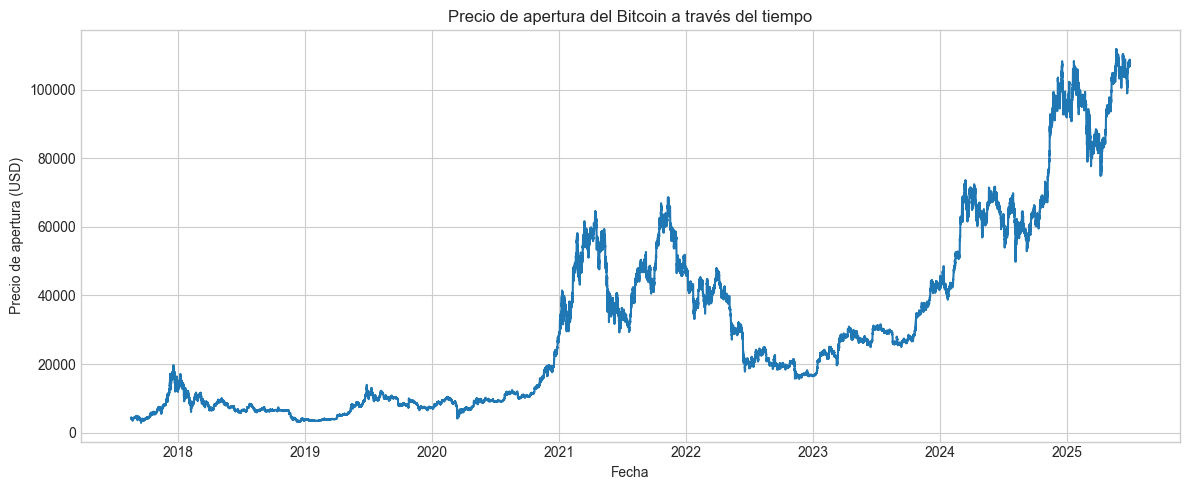

In [316]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="open")

plt.title("Precio de apertura del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de apertura (USD)")
plt.tight_layout()
plt.show()

## Precio más alto de rango de bitcoin a través de los años

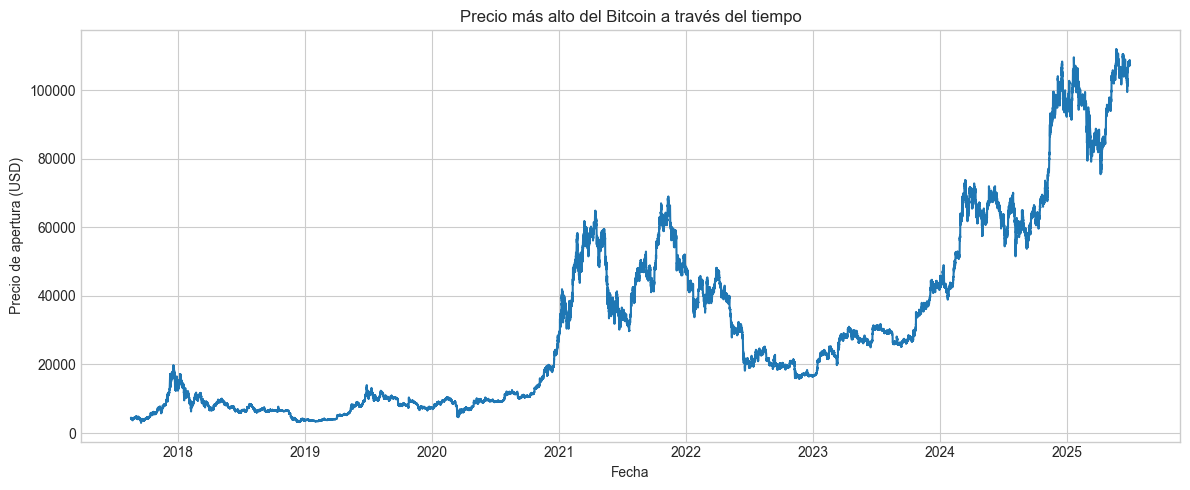

In [317]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="high")

plt.title("Precio más alto del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de apertura (USD)")
plt.tight_layout()
plt.show()

## Precio de cierre del Bitcoin a través del tiempo

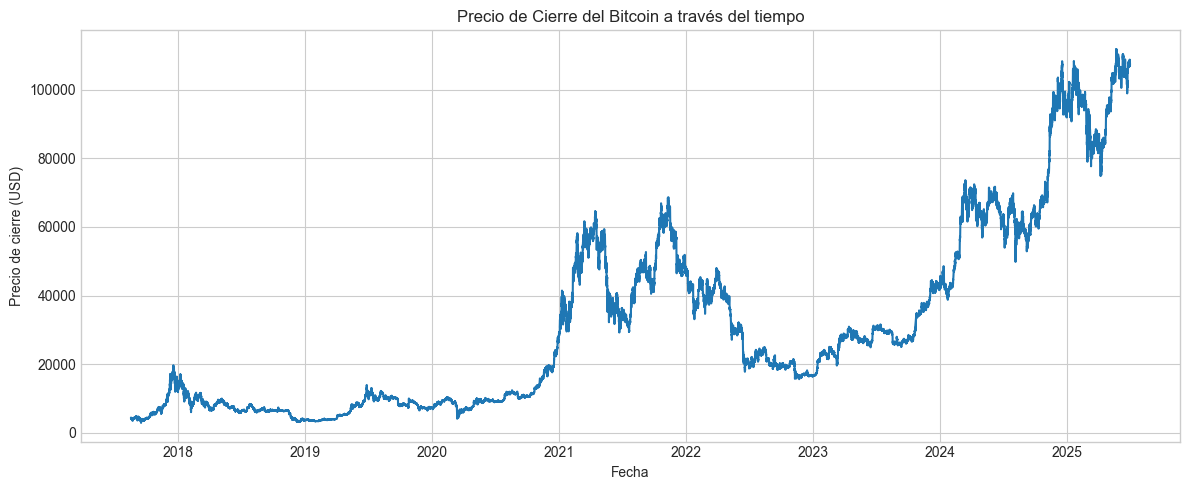

In [318]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hora, x=df_hora.index, y="close")

plt.title("Precio de Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio de cierre (USD)")
plt.tight_layout()
plt.show()

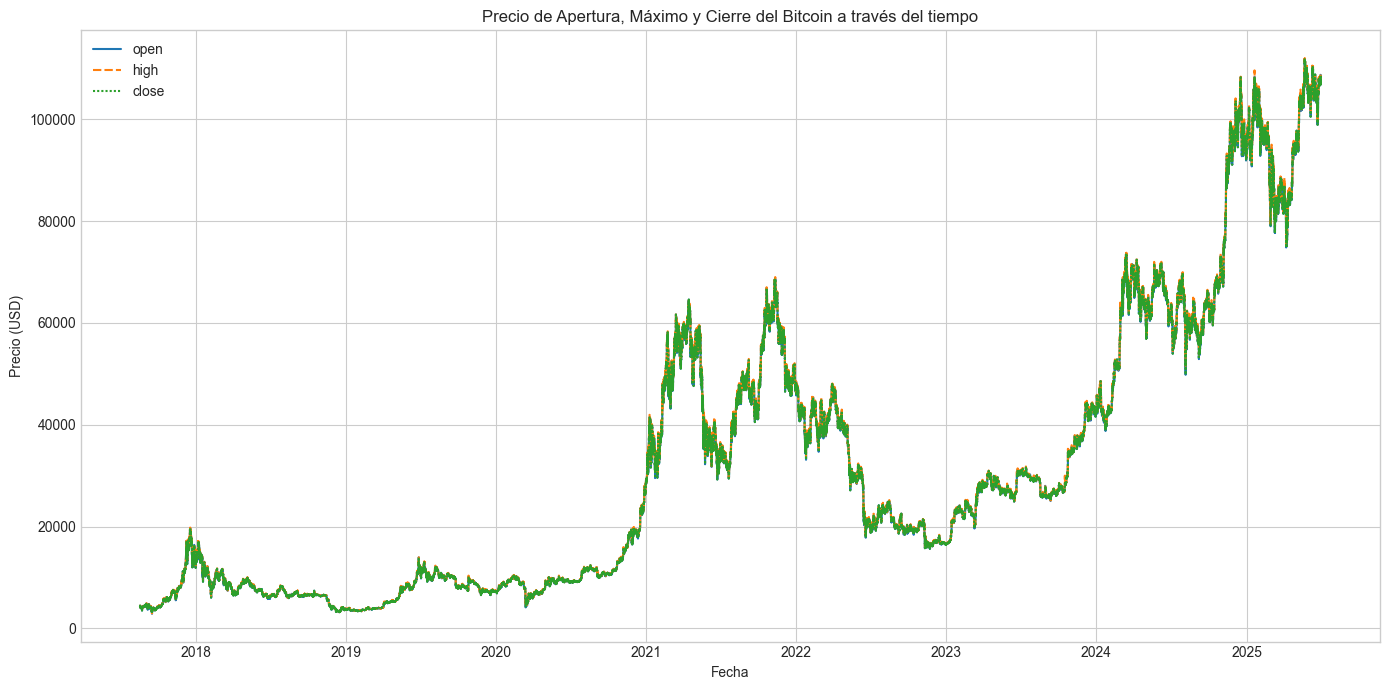

In [319]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_hora[["open", "high", "close"]])

plt.title("Precio de Apertura, Máximo y Cierre del Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.tight_layout()
plt.show()

In [320]:
df_hora.columns

Index(['date', 'hour', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'log_return', 'sma_3', 'sma_6', 'ema_3',
       'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
       'day_of_week', 'month', 'year'],
      dtype='object')

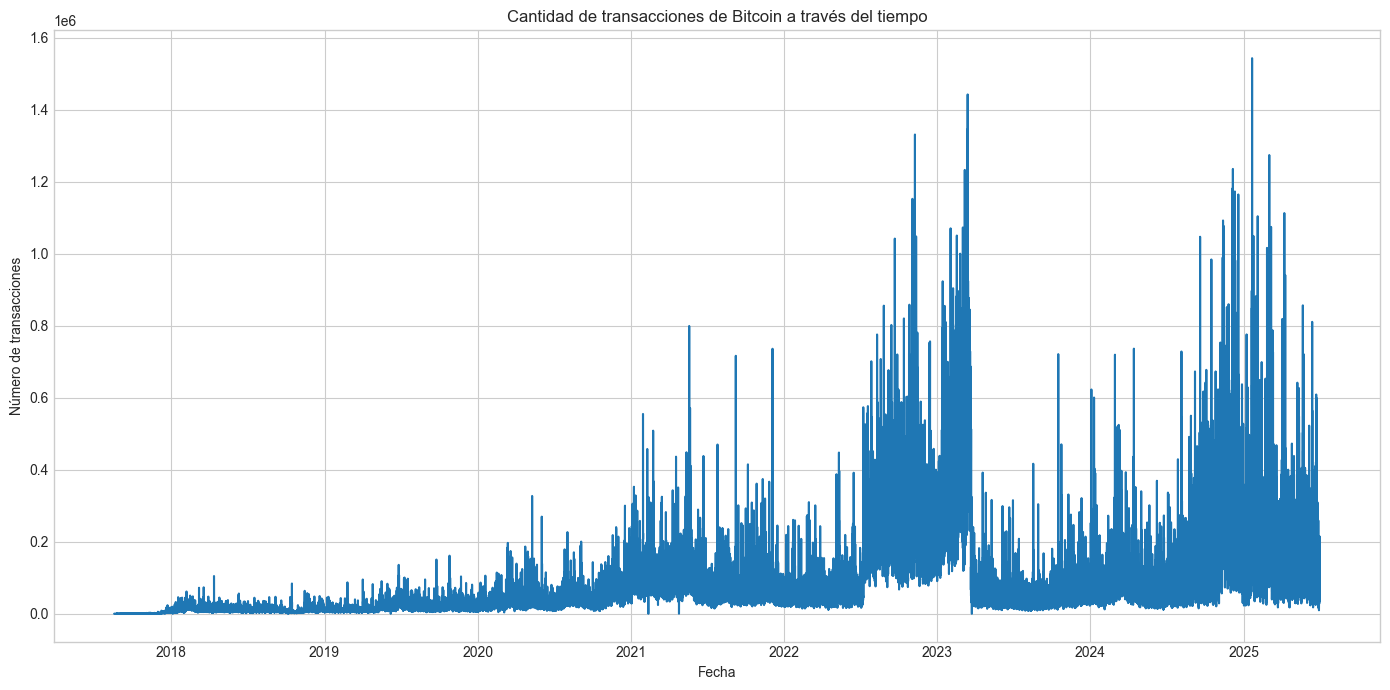

In [321]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_hora, x=df_hora.index, y="number_of_trades")

plt.title("Cantidad de transacciones de Bitcoin a través del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Número de transacciones")
plt.tight_layout()
plt.show()

In [322]:
df_hora.columns

Index(['date', 'hour', 'open', 'high', 'low', 'close', 'volume',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'log_return', 'sma_3', 'sma_6', 'ema_3',
       'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
       'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
       'day_of_week', 'month', 'year'],
      dtype='object')

In [323]:
fig = go.Figure(data=go.Ohlc(x=df_hora['date'],
                    open=df_hora['open'],
                    high=df_hora['high'],
                    low=df_hora['low'],
                    close=df_hora['close']))
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title="Precio de Apertura, Máximo, Mínimo y Cierre del Bitcoin",
                  xaxis_title="Fecha",
                  yaxis_title="Precio (USD)")
fig.show()

In [324]:
# Filtrar el DataFrame para el año 2025
df_2025 = df_hora[(df_hora.index.year == 2025) & (df_hora.index.month >= 6)]

# Crea la figura de Plotly con datos OHLC para 2025
fig = go.Figure(data=go.Ohlc(x=df_2025.index,
                    open=df_2025['open'],
                    high=df_2025['high'],
                    low=df_2025['low'],
                    close=df_2025['close']))

# Actualizar diseño
fig.update(layout_xaxis_rangeslider_visible=False)
fig.update_layout(title="Precio de Apertura, Máximo, Mínimo y Cierre del Bitcoin en 2025 (Junio)",
                  xaxis_title="Fecha",
                  yaxis_title="Precio (USD)")

fig.show()

# Mutual Information

Describe las relaciones en términos de incertidumbre. La información mutua (IM) entre dos magnitudes mide hasta qué punto el conocimiento de una reduce la incertidumbre sobre la otra. Si conociera el valor de una característica, ¿cuánta más confianza tendría en el objetivo?

In [325]:
from sklearn.feature_selection import mutual_info_regression

# X: todas las features numéricas
X = df_hora[['hour', 'open', 'high', 'low', 'volume',
             'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
             'taker_buy_quote_asset_volume', 'sma_3', 'sma_6', 'ema_3',
             'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
             'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
             'day_of_week', 'month']]

# y: variable objetivo continua
y = df_hora["close"]

# Calcular información mutua
mutual_info = mutual_info_regression(X, y)

# Crear un DataFrame ordenado
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Info': mutual_info})
mi_df = mi_df.sort_values(by='Mutual Info', ascending=False)

# Mostrar
print(mi_df)

                         Feature  Mutual Info
2                           high     5.419676
11                         ema_3     5.417678
3                            low     5.368279
9                          sma_3     5.138936
12                         ema_6     4.829393
1                           open     4.824936
10                         sma_6     4.633848
18                      bb_upper     3.980572
17                     bb_middle     3.977101
19                      bb_lower     3.940388
20                        atr_14     0.919298
25                         month     0.898192
6               number_of_trades     0.782296
5             quote_asset_volume     0.679627
8   taker_buy_quote_asset_volume     0.652002
22                         range     0.547409
13                          macd     0.469661
14                   macd_signal     0.466350
4                         volume     0.383045
7    taker_buy_base_asset_volume     0.381569
15                     macd_hist  

In [326]:
import plotly.express as px

mi_df_plot = mi_df.sort_values(by='Mutual Info', ascending=True)

# Gráfico de barras horizontal
fig = px.bar(
    mi_df_plot,
    x='Mutual Info',
    y='Feature',
    orientation='h',
    title='Importancia de Variables (Mutual Information con Close)',
    labels={'Mutual Info': 'Información Mutua', 'Feature': 'Variable'},
    color='Mutual Info',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    template='plotly_white',
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14
)

fig.show()

## Interpretación de los resultados

El análisis de Información Mutua (MI) clasifica la relevancia de cada variable con respecto al precio de cierre. A mayor valor de MI, mayor es la dependencia y la capacidad de la variable para predecir el precio.

### Variables Altamente Informativas (MI > 3.0)
Las variables con los valores de MI más altos (entre 3.9 y 5.4) son high, low, open, sma_3, ema_3, sma_6, ema_6, bb_upper, bb_middle y bb_lower. Esto indica una fuerte dependencia entre estas variables y el precio de cierre, lo cual es lógico, ya que todas son precios del activo o están calculadas directamente a partir de ellos.

### Variables de Informatividad Media (MI entre 0.3 y 1.0)
En este rango, se encuentran el atr_14, volume, macd y sus componentes, así como las variables de volumen (quote_asset_volume, taker_buy...). Estas variables demuestran ser relevantes, aunque con una influencia menor que los precios directos. Por ejemplo, el atr_14 (Average True Range) al medir la volatilidad, y el volumen al indicar la actividad del mercado, muestran una relación con los movimientos del precio de cierre.

### Variables de Baja o Nula Informatividad (MI < 0.3)
Las variables rsi_14, body, buy_pressure, day_of_week y hour presentan la menor capacidad predictiva. El valor bajo del rsi_14 indica que no es un predictor directo del precio de cierre. De manera importante, el análisis muestra que la hour del día o el day_of_week tienen una influencia casi nula en el precio del Bitcoin, lo cual es coherente con un mercado que opera 24/7.

# Refinando Features

Revisar el papel de cada feature para identificar posibles fugas de datos al predecir el precio de cierre en el paso de tiempo actual.

## Creando Lagged Features

In [327]:
# Copiamos el dataframe para no alterar el original que podría usarse para LSTM
df_lagged = df_hora.copy()

# Características a las que se les aplicará un lag
features_to_lag = [
    'sma_3', 'sma_6', 'ema_3', 'ema_6', 'macd', 'macd_signal', 'macd_hist',
    'rsi_14', 'bb_middle', 'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure',
    'range', 'body', 'open', 'high', 'low', 'volume', 'quote_asset_volume',
    'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume',
    'log_return', 'close'
]

# Número de lags a crear
n_lags = 5

# Creando las características con lag (rezagadas)
for feature in features_to_lag:
    for lag in range(1, n_lags + 1):
        df_lagged[f'{feature}_lag_{lag}'] = df_lagged[feature].shift(lag)

display(df_lagged.head())

date  hour     open     high      low    close  \
Datetime                                                                   
2017-08-17 04:00:00 2017-08-17     4  4261.48  4313.62  4261.32  4308.83   
2017-08-17 05:00:00 2017-08-17     5  4308.83  4328.69  4291.37  4315.32   
2017-08-17 06:00:00 2017-08-17     6  4315.32  4345.45  4309.37  4324.35   
2017-08-17 07:00:00 2017-08-17     7  4324.35  4349.99  4287.41  4349.99   
2017-08-17 08:00:00 2017-08-17     8  4333.32  4377.85  4333.32  4360.69   

                        volume  quote_asset_volume  number_of_trades  \
Datetime                                                               
2017-08-17 04:00:00  47.181009       202366.138393             171.0   
2017-08-17 05:00:00  23.234916       100304.823567             102.0   
2017-08-17 06:00:00   7.229691        31282.312670              36.0   
2017-08-17 07:00:00   4.443249        19241.058300              25.0   
2017-08-17 08:00:00   0.972807         4239.503586              28.0   

                     taker_buy_base_asset_volume  ...  log_return_lag_1  \
Datetime                                          ...                     
2017-08-17 04:00:00                    35.160503  ...               NaN   
2017-08-17 05:00:00                    21.448071  ...          0.000082   
2017-08-17 06:00:00                     4.802861  ...          0.001505   
2017-08-17 07:00:00                     2.602292  ...          0.002090   
2017-08-17 08:00:00                     0.814655  ...          0.005912   

                     log_return_lag_2  log_return_lag_3  log_return_lag_4  \
Datetime                                                                    
2017-08-17 04:00:00               NaN               NaN               NaN   
2017-08-17 05:00:00               NaN               NaN               NaN   
2017-08-17 06:00:00          0.000082               NaN               NaN   
2017-08-17 07:00:00          0.001505          0.000082               NaN   
2017-08-17 08:00:00          0.002090          0.001505          0.000082   

                     log_return_lag_5  close_lag_1  close_lag_2  close_lag_3  \
Datetime                                                                       
2017-08-17 04:00:00               NaN          NaN          NaN          NaN   
2017-08-17 05:00:00               NaN      4308.83          NaN          NaN   
2017-08-17 06:00:00               NaN      4315.32      4308.83          NaN   
2017-08-17 07:00:00               NaN      4324.35      4315.32      4308.83   
2017-08-17 08:00:00               NaN      4349.99      4324.35      4315.32   

                     close_lag_4  close_lag_5  
Datetime                                       
2017-08-17 04:00:00          NaN          NaN  
2017-08-17 05:00:00          NaN          NaN  
2017-08-17 06:00:00          NaN          NaN  
2017-08-17 07:00:00          NaN          NaN  
2017-08-17 08:00:00      4308.83          NaN  

[5 rows x 155 columns]

### Borrando Nulos a partir de las nuevas características rezagadas:

In [328]:
# Eliminamos las filas con valores NaN generados por los lags
df_lagged.dropna(inplace=True)

display(df_lagged.isnull().sum().sum())

np.int64(0)

### Definiendo el target

In [329]:
# El objetivo es predecir el precio de cierre de la siguiente hora
df_lagged['target_close'] = df_lagged['close'].shift(-1)

# Eliminamos la última fila que tendrá un NaN en el target
df_lagged.dropna(subset=['target_close'], inplace=True)

# Definimos las características (X) que usará el modelo.
# Se usan las características con lag y las temporales.
# Se excluyen los indicadores técnicos del tiempo actual para evitar data leakage.
features = [
    col for col in df_lagged.columns if '_lag_' in col or col in [
        'day_of_week', 'month', 'year', 'hour', 'open', 'high', 'low', 
        'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
    ]
]

X = df_lagged[features]
y = df_lagged['target_close']

# Entrenamiento de ML

## División de datos

In [330]:
"""
¿Por qué se debe realizar de esta mandera?

La partición de datos no debe ser aleatoria con los métodos comunes. Ya que estamos tratando con series temporales,
debe buscarse el porcentaje de datos que se utilizarán para el entrenamiento en el orden cronológico indicado en el dataset (para este caso, en horas).

"""
# En series temporales, la partición debe ser cronológica.
train_proportion = 0.98
split_index = int(len(df_lagged) * train_proportion)

X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

X_test = X.iloc[split_index:]
y_test = y.iloc[split_index:]

print(f"\nDatos de entrenamiento (X, y): {X_train.shape}, {y_train.shape}")
print(f"Datos de prueba (X, y): {X_test.shape}, {y_test.shape}")


Datos de entrenamiento (X, y): (67484, 137), (67484,)
Datos de prueba (X, y): (1378, 137), (1378,)


## Escalado de datos

In [331]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nEscalado de datos completado.")


Escalado de datos completado.


## Implementación de modelos

### Random Forest model

In [332]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [333]:
# Inicialización del modelo Random Forest
# Nota: Los modelos basados en árboles como Random Forest no requieren escalado de
# características, por lo que usamos X_train y X_test directamente.
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

In [334]:
# Entrenamiento del modelo
print("\nEntrenando Random Forest Regressor...")
rf_regressor.fit(X_train, y_train)
print("Entrenamiento de Random Forest Regressor completado.")


Entrenando Random Forest Regressor...
Entrenamiento de Random Forest Regressor completado.


In [335]:
# Realización de predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)

In [336]:
# Evaluación del rendimiento del modelo
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("\nRendimiento de Random Forest Regressor - Comparativa 1:")
print(f"Mean Squared Error (MSE): {round(rf_mse,2)}")
print(f"Root Mean Squared Error (RMSE): {round(rf_rmse,2)}")
print(f"Mean Absolute Error (MAE): {round(rf_mae,2)}")
print(f"R-squared (R2): {round(rf_r2,4)}")


Rendimiento de Random Forest Regressor - Comparativa 1:
Mean Squared Error (MSE): 1514764.65
Root Mean Squared Error (RMSE): 1230.76
Mean Absolute Error (MAE): 803.98
R-squared (R2): 0.8695


### XGBoost Regressor

In [229]:
import xgboost as xgb

In [230]:
# Inicialización del modelo XGBoost
# Al igual que Random Forest, XGBoost no requiere datos escalados.
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror',
                                 eval_metric='rmse',
                                 max_depth=5,
                                 eta=0.1,
                                 subsample=0.8,
                                 colsample_bytree=0.8,
                                 n_estimators=100,
                                 random_state=42)

In [231]:
# Entrenamiento del modelo
print("\nTraining XGBoost Regressor - Comparativa 1...")
xgb_regressor.fit(X_train, y_train)
print("XGBoost Regressor training complete - Comparativa 1.")


Training XGBoost Regressor - Comparativa 1...
XGBoost Regressor training complete - Comparativa 1.


In [232]:
# Realización de predicciones en el conjunto de prueba
xgb_predictions = xgb_regressor.predict(X_test)

In [233]:
# Evaluación del rendimiento del modelo
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nRendimiento XGBoost Regressor - Comparativa 1:")
print(f"Mean Squared Error (MSE): {round(xgb_mse,2)}")
print(f"Root Mean Squared Error (RMSE): {round(xgb_rmse,2)}")
print(f"Mean Absolute Error (MAE): {round(xgb_mae,2)}")
print(f"R-squared (R2): {round(xgb_r2,4)}")


Rendimiento XGBoost Regressor - Comparativa 1:
Mean Squared Error (MSE): 4056118.0
Root Mean Squared Error (RMSE): 2013.98
Mean Absolute Error (MAE): 1425.01
R-squared (R2): 0.6505


### DecisionTreeRegressor

In [234]:
from sklearn.tree import DecisionTreeRegressor

In [235]:
# Instancia del modelo Decision Tree Regressor
# Al ser un modelo basado en árboles, no se utilizan los datos escalados.
dt_regressor = DecisionTreeRegressor(random_state=42)

In [236]:
# Entrenamiento del modelo
print("\nTraining Decision Tree Regressor - Comparativa 1...")
dt_regressor.fit(X_train, y_train)
print("Decision Tree Regressor training complete - Comparativa 1.")


Training Decision Tree Regressor - Comparativa 1...
Decision Tree Regressor training complete - Comparativa 1.


In [237]:
# Realización de predicciones en el conjunto de prueba
dt_predictions = dt_regressor.predict(X_test)

In [238]:
# Evaluación del rendimiento del modelo
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("\nRendimiento Decision Tree Regressor - Comparativa 1:")
print(f"Mean Squared Error (MSE): {round(dt_mse,2)}")
print(f"Root Mean Squared Error (RMSE): {round(dt_rmse,2)}")
print(f"Mean Absolute Error (MAE): {round(dt_mae,2)}")
print(f"R-squared (R2): {round(dt_r2,4)}")


Rendimiento Decision Tree Regressor - Comparativa 1:
Mean Squared Error (MSE): 1300785.24
Root Mean Squared Error (RMSE): 1140.52
Mean Absolute Error (MAE): 818.47
R-squared (R2): 0.8879


## 2da Comparativa

En esta sección, se reentrenarán los modelos utilizando únicamente
características rezagadas y temporales, excluyendo datos de la hora actual
(open, high, low, volume, etc.) para una evaluación más estricta.

### Preparación de Datos

In [239]:
# Se utiliza el mismo dataframe con lags (df_lagged) pero se redefine el conjunto de features.

# Definir las características (X) y el objetivo (Y) para la comparativa 2
# Se excluyen las características OHLCV y de volumen de la hora actual.
features_comp2 = [col for col in df_lagged.columns if '_lag_' in col or col in ['day_of_week', 'month', 'year', 'hour']]

X_comp2 = df_lagged[features_comp2]
y_comp2 = df_lagged['target_close'] # El target sigue siendo el mismo

# Partición de datos para la comparativa 2
# Se usa el mismo índice de división para una comparación justa.
X_train_comp2 = X_comp2.iloc[:split_index]
y_train_comp2 = y_comp2.iloc[:split_index]

X_test_comp2 = X_comp2.iloc[split_index:]
y_test_comp2 = y_comp2.iloc[split_index:]

print(f"\nDatos de entrenamiento (Comparativa 2): {X_train_comp2.shape}, {y_train_comp2.shape}")
print(f"Datos de prueba (Comparativa 2): {X_test_comp2.shape}, {y_test_comp2.shape}")

# Escalado de Características para la comparativa 2
# Aunque los modelos de árbol no lo necesitan, se prepara para otros modelos.
scaler_comp2 = MinMaxScaler()
X_train_scaled_comp2 = scaler_comp2.fit_transform(X_train_comp2)
X_test_scaled_comp2 = scaler_comp2.transform(X_test_comp2)

print("\nEscalado de datos completado para la Comparativa 2.")


Datos de entrenamiento (Comparativa 2): (67484, 129), (67484,)
Datos de prueba (Comparativa 2): (1378, 129), (1378,)

Escalado de datos completado para la Comparativa 2.


### Random Forest Regressor (Comparativa 2)

In [240]:
# Instancia del modelo
rf_regressor_comp2 = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Entrenamiento
print("\nTraining Random Forest Regressor - Comparativa 2...")
rf_regressor_comp2.fit(X_train_comp2, y_train_comp2)
print("Random Forest Regressor training complete - Comparativa 2.")

# Predicciones
rf_predictions_comp2 = rf_regressor_comp2.predict(X_test_comp2)

# Evaluación
rf_mse_comp2 = mean_squared_error(y_test_comp2, rf_predictions_comp2)
rf_rmse_comp2 = np.sqrt(rf_mse_comp2)
rf_mae_comp2 = mean_absolute_error(y_test_comp2, rf_predictions_comp2)
rf_r2_comp2 = r2_score(y_test_comp2, rf_predictions_comp2)

print("\nRendimiento Random Forest Regressor - Comparativa 2:")
print(f"Mean Squared Error (MSE): {rf_mse_comp2}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse_comp2}")
print(f"Mean Absolute Error (MAE): {rf_mae_comp2}")
print(f"R-squared (R2): {rf_r2_comp2}")


Training Random Forest Regressor - Comparativa 2...
Random Forest Regressor training complete - Comparativa 2.

Rendimiento Random Forest Regressor - Comparativa 2:
Mean Squared Error (MSE): 1887825.2043210843
Root Mean Squared Error (RMSE): 1373.9815152763463
Mean Absolute Error (MAE): 946.6553055152377
R-squared (R2): 0.8373314947695715


### XGBoost Regressor (Comparativa 2)

In [241]:
# Instancia del modelo
xgb_regressor_comp2 = xgb.XGBRegressor(objective='reg:squarederror',
                                     eval_metric='rmse',
                                     max_depth=5,
                                     eta=0.1,
                                     subsample=0.8,
                                     colsample_bytree=0.8,
                                     n_estimators=100,
                                     random_state=42)

# Entrenamiento
print("\nTraining XGBoost Regressor - Comparativa 2...")
xgb_regressor_comp2.fit(X_train_comp2, y_train_comp2)
print("XGBoost Regressor training complete - Comparativa 2.")

# Predicciones
xgb_predictions_comp2 = xgb_regressor_comp2.predict(X_test_comp2)

# Evaluación
xgb_mse_comp2 = mean_squared_error(y_test_comp2, xgb_predictions_comp2)
xgb_rmse_comp2 = np.sqrt(xgb_mse_comp2)
xgb_mae_comp2 = mean_absolute_error(y_test_comp2, xgb_predictions_comp2)
xgb_r2_comp2 = r2_score(y_test_comp2, xgb_predictions_comp2)

print("\nRendimiento XGBoost Regressor - Comparativa 2:")
print(f"Mean Squared Error (MSE): {xgb_mse_comp2}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_comp2}")
print(f"Mean Absolute Error (MAE): {xgb_mae_comp2}")
print(f"R-squared (R2): {xgb_r2_comp2}")


Training XGBoost Regressor - Comparativa 2...
XGBoost Regressor training complete - Comparativa 2.

Rendimiento XGBoost Regressor - Comparativa 2:
Mean Squared Error (MSE): 4404072.165972303
Root Mean Squared Error (RMSE): 2098.5881363364997
Mean Absolute Error (MAE): 1522.0767926796082
R-squared (R2): 0.6205136818144721


### Decision Tree Regressor (Comparativa 2)

In [242]:
# Instancia del modelo
dt_regressor_comp2 = DecisionTreeRegressor(random_state=42)

# Entrenamiento
print("\nTraining Decision Tree Regressor - Comparativa 2...")
dt_regressor_comp2.fit(X_train_comp2, y_train_comp2)
print("Decision Tree Regressor training complete - Comparativa 2.")

# Predicciones
dt_predictions_comp2 = dt_regressor_comp2.predict(X_test_comp2)

# Evaluación
dt_mse_comp2 = mean_squared_error(y_test_comp2, dt_predictions_comp2)
dt_rmse_comp2 = np.sqrt(dt_mse_comp2)
dt_mae_comp2 = mean_absolute_error(y_test_comp2, dt_predictions_comp2)
dt_r2_comp2 = r2_score(y_test_comp2, dt_predictions_comp2)

print("\nRendimiento Decision Tree Regressor - Comparativa 2:")
print(f"Mean Squared Error (MSE): {dt_mse_comp2}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse_comp2}")
print(f"Mean Absolute Error (MAE): {dt_mae_comp2}")
print(f"R-squared (R2): {dt_r2_comp2}")



Training Decision Tree Regressor - Comparativa 2...
Decision Tree Regressor training complete - Comparativa 2.

Rendimiento Decision Tree Regressor - Comparativa 2:
Mean Squared Error (MSE): 2305707.2100465926
Root Mean Squared Error (RMSE): 1518.4555344318096
Mean Absolute Error (MAE): 1122.5638461538472
R-squared (R2): 0.801323796027935


### COMPARACIÓN GRÁFICA DE RESULTADOS

In [244]:
# Se recopilan todas las métricas en una estructura de datos para facilitar la visualización.

data = {
    'Comparativa': [
        'Comp 1', 'Comp 1', 'Comp 1', 'Comp 2', 'Comp 2', 'Comp 2'
    ],
    'Modelo': [
        'Random Forest', 'XGBoost', 'Decision Tree',
        'Random Forest', 'XGBoost', 'Decision Tree'
    ],
    'RMSE': [
        1230.76, 2013.98, 1140.52, 1373.98, 2098.59, 1518.46
    ],
    'MAE': [
        803.98, 1425.01, 818.47, 946.66, 1522.08, 1122.56
    ],
    'R-squared': [
        0.8695, 0.6505, 0.8879, 0.8373, 0.6205, 0.8013
    ]
}

results_df = pd.DataFrame(data)

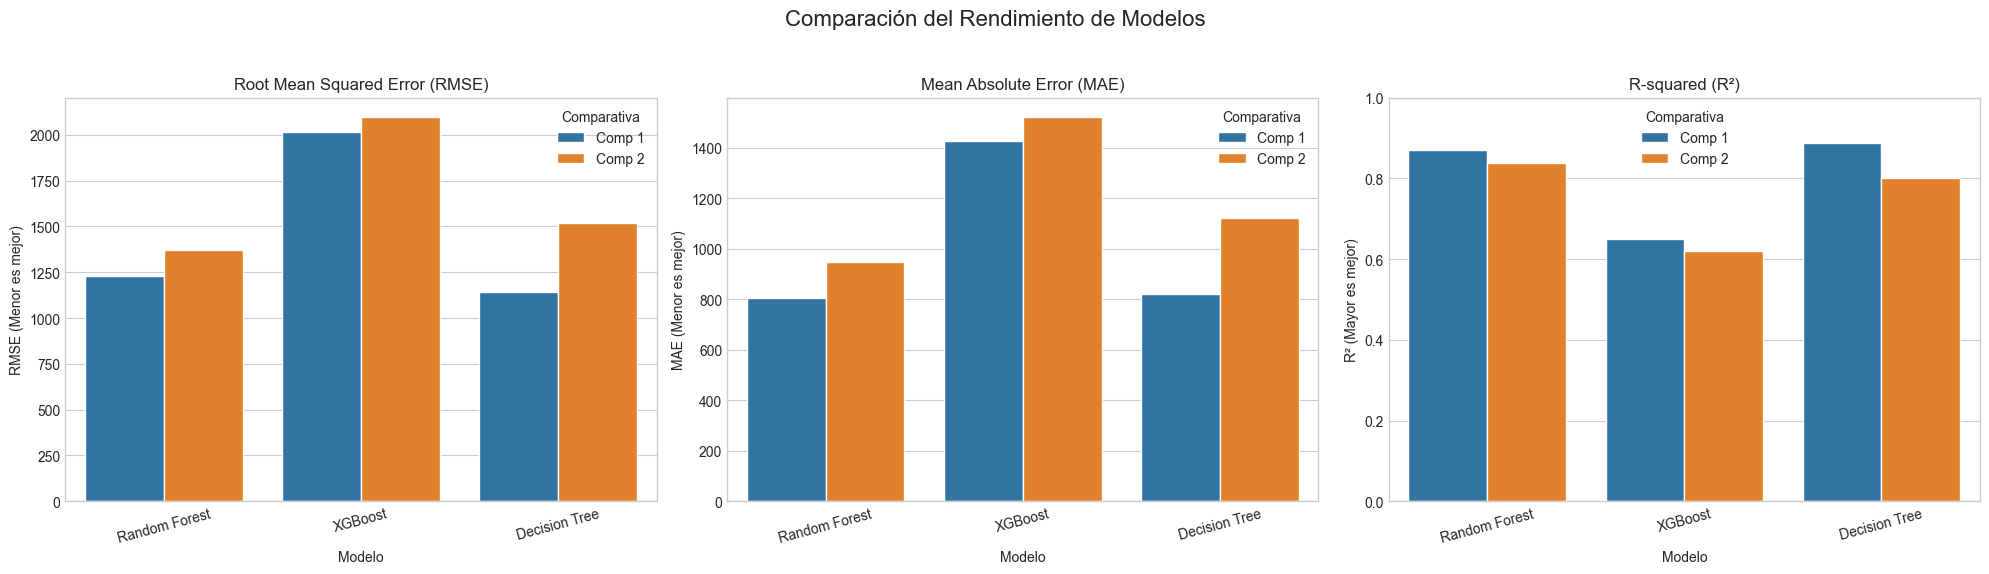

In [245]:
# Se generan gráficos de barras para comparar el rendimiento de los modelos.
# Un menor RMSE/MAE es mejor. Un mayor R-squared es mejor.

# Configuración de los gráficos
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Comparación del Rendimiento de Modelos', fontsize=16)

# Gráfico para RMSE
sns.barplot(x='Modelo', y='RMSE', hue='Comparativa', data=results_df, ax=axes[0])
axes[0].set_title('Root Mean Squared Error (RMSE)')
axes[0].set_ylabel('RMSE (Menor es mejor)')
axes[0].tick_params(axis='x', rotation=15)

# Gráfico para MAE
sns.barplot(x='Modelo', y='MAE', hue='Comparativa', data=results_df, ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE (Menor es mejor)')
axes[1].tick_params(axis='x', rotation=15)

# Gráfico para R-squared
sns.barplot(x='Modelo', y='R-squared', hue='Comparativa', data=results_df, ax=axes[2])
axes[2].set_title('R-squared (R²)')
axes[2].set_ylabel('R² (Mayor es mejor)')
axes[2].set_ylim(0, 1) # R-squared va de 0 a 1
axes[2].tick_params(axis='x', rotation=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### K-Nearest Neighbors (KNN) Regressor

In [246]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [247]:
# KNN se basa en distancias, por lo que es fundamental que todas las
# características tengan una escala similar. Usamos StandardScaler.
print("\nEscalando datos específicamente para KNN...")
scaler_knn = StandardScaler()
X_train_scaled = scaler_knn.fit_transform(X_train)
X_test_scaled = scaler_knn.transform(X_test)

# Instanciar y entrenar el modelo KNN
knn_regressor = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
print("Entrenando K-Nearest Neighbors Regressor...")
knn_regressor.fit(X_train_scaled, y_train)
print("Entrenamiento completado.")

# Realizar predicciones
knn_predictions = knn_regressor.predict(X_test_scaled)

# Evaluar modelo
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("\nRendimiento K-Nearest Neighbors Regressor:")
print(f"Root Mean Squared Error (RMSE): {round(knn_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(knn_mae, 2)}")
print(f"R-squared (R2): {round(knn_r2, 4)}")


Escalando datos específicamente para KNN...
Entrenando K-Nearest Neighbors Regressor...
Entrenamiento completado.

Rendimiento K-Nearest Neighbors Regressor:
Root Mean Squared Error (RMSE): 6086.35
Mean Absolute Error (MAE): 5452.13
R-squared (R2): -2.1919


### Support Vector Regressor (SVR) con Optimización

In [248]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import time

In [249]:
# SVR también es sensible a la escala de las características.
# Usaremos los datos ya escalados con StandardScaler del paso anterior (KNN).
print("\nPreparando datos para el modelo SVR...")

# Usar un subconjunto de datos es una excelente idea para acelerar la búsqueda de hiperparámetros.
subset_size = 40000
X_train_subset = X_train_scaled[-subset_size:]
y_train_subset = y_train.iloc[-subset_size:]

print(f"Iniciando la búsqueda de los mejores hiperparámetros para SVR...")
print(f"Usando un subconjunto de {len(X_train_subset)} registros.")

# Define el modelo base
svr = SVR(kernel='rbf')

# Define el diccionario de parámetros que quieres probar.
param_grid = {
    'C': [10, 100, 500],
    'gamma': ['scale', 'auto'],
    'epsilon': [0.1, 0.01]
}

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=svr,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2 # Muestra el progreso
)

# Medir el tiempo de búsqueda y entrenamiento
start_time = time.time()

# Ejecuta la búsqueda en el subconjunto de datos
grid_search.fit(X_train_subset, y_train_subset)

end_time = time.time()
training_time = end_time - start_time

# El mejor modelo ya está entrenado y guardado en grid_search.best_estimator_
svr_model_best = grid_search.best_estimator_

print(f"\nBúsqueda y entrenamiento completados en {training_time:.2f} segundos.")
print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

print("\nRealizando predicciones en el conjunto de prueba con el modelo optimizado...")
y_pred_svr = svr_model_best.predict(X_test_scaled)


Preparando datos para el modelo SVR...
Iniciando la búsqueda de los mejores hiperparámetros para SVR...
Usando un subconjunto de 40000 registros.
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Búsqueda y entrenamiento completados en 1634.29 segundos.
Mejores parámetros encontrados: {'C': 500, 'epsilon': 0.1, 'gamma': 'auto'}

Realizando predicciones en el conjunto de prueba con el modelo optimizado...


In [250]:
# Calcular las métricas de evaluación
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Imprimir los resultados de la evaluación
print("\n--- Métricas de Evaluación del Modelo SVR Optimizado ---")
print(f"Error Absoluto Medio (MAE):       ${mae_svr:,.2f}")
print(f"Error Cuadrático Medio (MSE):     ${mse_svr:,.2f}")
print(f"Raíz del Error Cuadrático (RMSE): ${rmse_svr:,.2f}")
print(f"Coeficiente de Determinación (R²): {r2_svr:.4f}")


--- Métricas de Evaluación del Modelo SVR Optimizado ---
Error Absoluto Medio (MAE):       $7,082.10
Error Cuadrático Medio (MSE):     $89,058,905.94
Raíz del Error Cuadrático (RMSE): $9,437.10
Coeficiente de Determinación (R²): -6.6740


### LSTM

In [259]:
# Importar las librerías necesarias
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [260]:
# Usamos el DataFrame original sin lags manuales
df_no_lag = df_hora.copy()

# Seleccionar las características
features_for_lstm = [
    'hour', 'open', 'high', 'low', 'close', 'volume',
    'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
    'taker_buy_quote_asset_volume', 'log_return', 'sma_3', 'sma_6', 'ema_3',
    'ema_6', 'macd', 'macd_signal', 'macd_hist', 'rsi_14', 'bb_middle',
    'bb_upper', 'bb_lower', 'atr_14', 'buy_pressure', 'range', 'body',
    'day_of_week', 'month'
]
lstm_df = df_no_lag[features_for_lstm].copy()

# Escalar los datos
print("1. Escalando los datos para LSTM...")
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler_lstm.fit_transform(lstm_df)

1. Escalando los datos para LSTM...


In [261]:
# --- 2. Creación de Secuencias ---
time_steps = 60

# Dividir los datos en entrenamiento y prueba
train_size = int(len(scaled_data) * 0.98)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - time_steps:, :]

def create_sequences(dataset, time_steps=60):
    X, y = [], []
    close_price_index = features_for_lstm.index('close')
    for i in range(time_steps, len(dataset)):
        X.append(dataset[i-time_steps:i, :])
        y.append(dataset[i, close_price_index])
    return np.array(X), np.array(y)

print(f"2. Creando secuencias con {time_steps} pasos de tiempo...")
X_train_lstm, y_train_lstm = create_sequences(train_data, time_steps)
X_test_lstm, y_test_lstm = create_sequences(test_data, time_steps)

print(f"Forma de X_train_lstm: {X_train_lstm.shape}")
print(f"Forma de X_test_lstm: {X_test_lstm.shape}")

2. Creando secuencias con 60 pasos de tiempo...
Forma de X_train_lstm: (67430, 60, 28)
Forma de X_test_lstm: (1378, 60, 28)


In [262]:
# --- 3. Construcción del Modelo ---
print("\n3. Construyendo el modelo LSTM...")
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.summary()


3. Construyendo el modelo LSTM...


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        15,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,301 (145.71 KB)

 Trainable params: 37,301 (145.71 KB)

 Non-trainable params: 0 (0.00 B)

In [263]:
# --- 4. Entrenamiento del Modelo ---
print("\n4. Entrenando el modelo LSTM...")
history = model_lstm.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=20, validation_data=(X_test_lstm, y_test_lstm))


4. Entrenando el modelo LSTM...
Epoch 1/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 2/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - loss: 5.0023e-04 - val_loss: 2.5370e-04
Epoch 3/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 92s 44ms/step - loss: 4.8815e-04 - val_loss: 0.0034
Epoch 4/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - loss: 4.6015e-04 - val_loss: 4.8123e-04
Epoch 5/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 93s 43ms/step - loss: 4.4111e-04 - val_loss: 8.8909e-04
Epoch 6/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 42s 20ms/step - loss: 4.5861e-04 - val_loss: 0.0029
Epoch 7/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 4.2439e-04 - val_loss: 0.0022
Epoch 8/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 4.3055e-04 - val_loss: 4.7390e-05
Epoch 9/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - loss: 3.9474e-04 - val_loss: 2.2453e-04
Epoch 10/20
2108/2108 ━━━━━━━━━━━━━━━━━━━━ 46s 21ms/step - loss: 3.8907e-04 - val_loss: 3.9124e-04
Epoch 

In [264]:
# --- 5. Evaluación del Modelo ---
print("\n5. Realizando predicciones y evaluando el modelo...")
predictions_scaled = model_lstm.predict(X_test_lstm)

# Invertir la escala de las predicciones
predictions_full_shape = np.zeros((len(predictions_scaled), len(features_for_lstm)))
close_price_index = features_for_lstm.index('close')
predictions_full_shape[:, close_price_index] = predictions_scaled.flatten()
predictions_unscaled = scaler_lstm.inverse_transform(predictions_full_shape)[:, close_price_index]

# Obtener los valores reales para la comparación
y_test_unscaled = df_no_lag['close'].iloc[train_size:].values
# Alinear los tamaños
y_test_for_eval = y_test_unscaled[:len(predictions_unscaled)]

# Calcular métricas
lstm_mse = mean_squared_error(y_test_for_eval, predictions_unscaled)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_for_eval, predictions_unscaled)
lstm_r2 = r2_score(y_test_for_eval, predictions_unscaled)

print("\nRendimiento LSTM Regressor:")
print(f"Mean Squared Error (MSE): {round(lstm_mse, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(lstm_rmse, 2)}")
print(f"Mean Absolute Error (MAE): {round(lstm_mae, 2)}")
print(f"R-squared (R2): {round(lstm_r2, 4)}")


5. Realizando predicciones y evaluando el modelo...
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step

Rendimiento LSTM Regressor:
Mean Squared Error (MSE): 2540937.67
Root Mean Squared Error (RMSE): 1594.03
Mean Absolute Error (MAE): 1368.79
R-squared (R2): 0.7811


### Graficos de los modelos

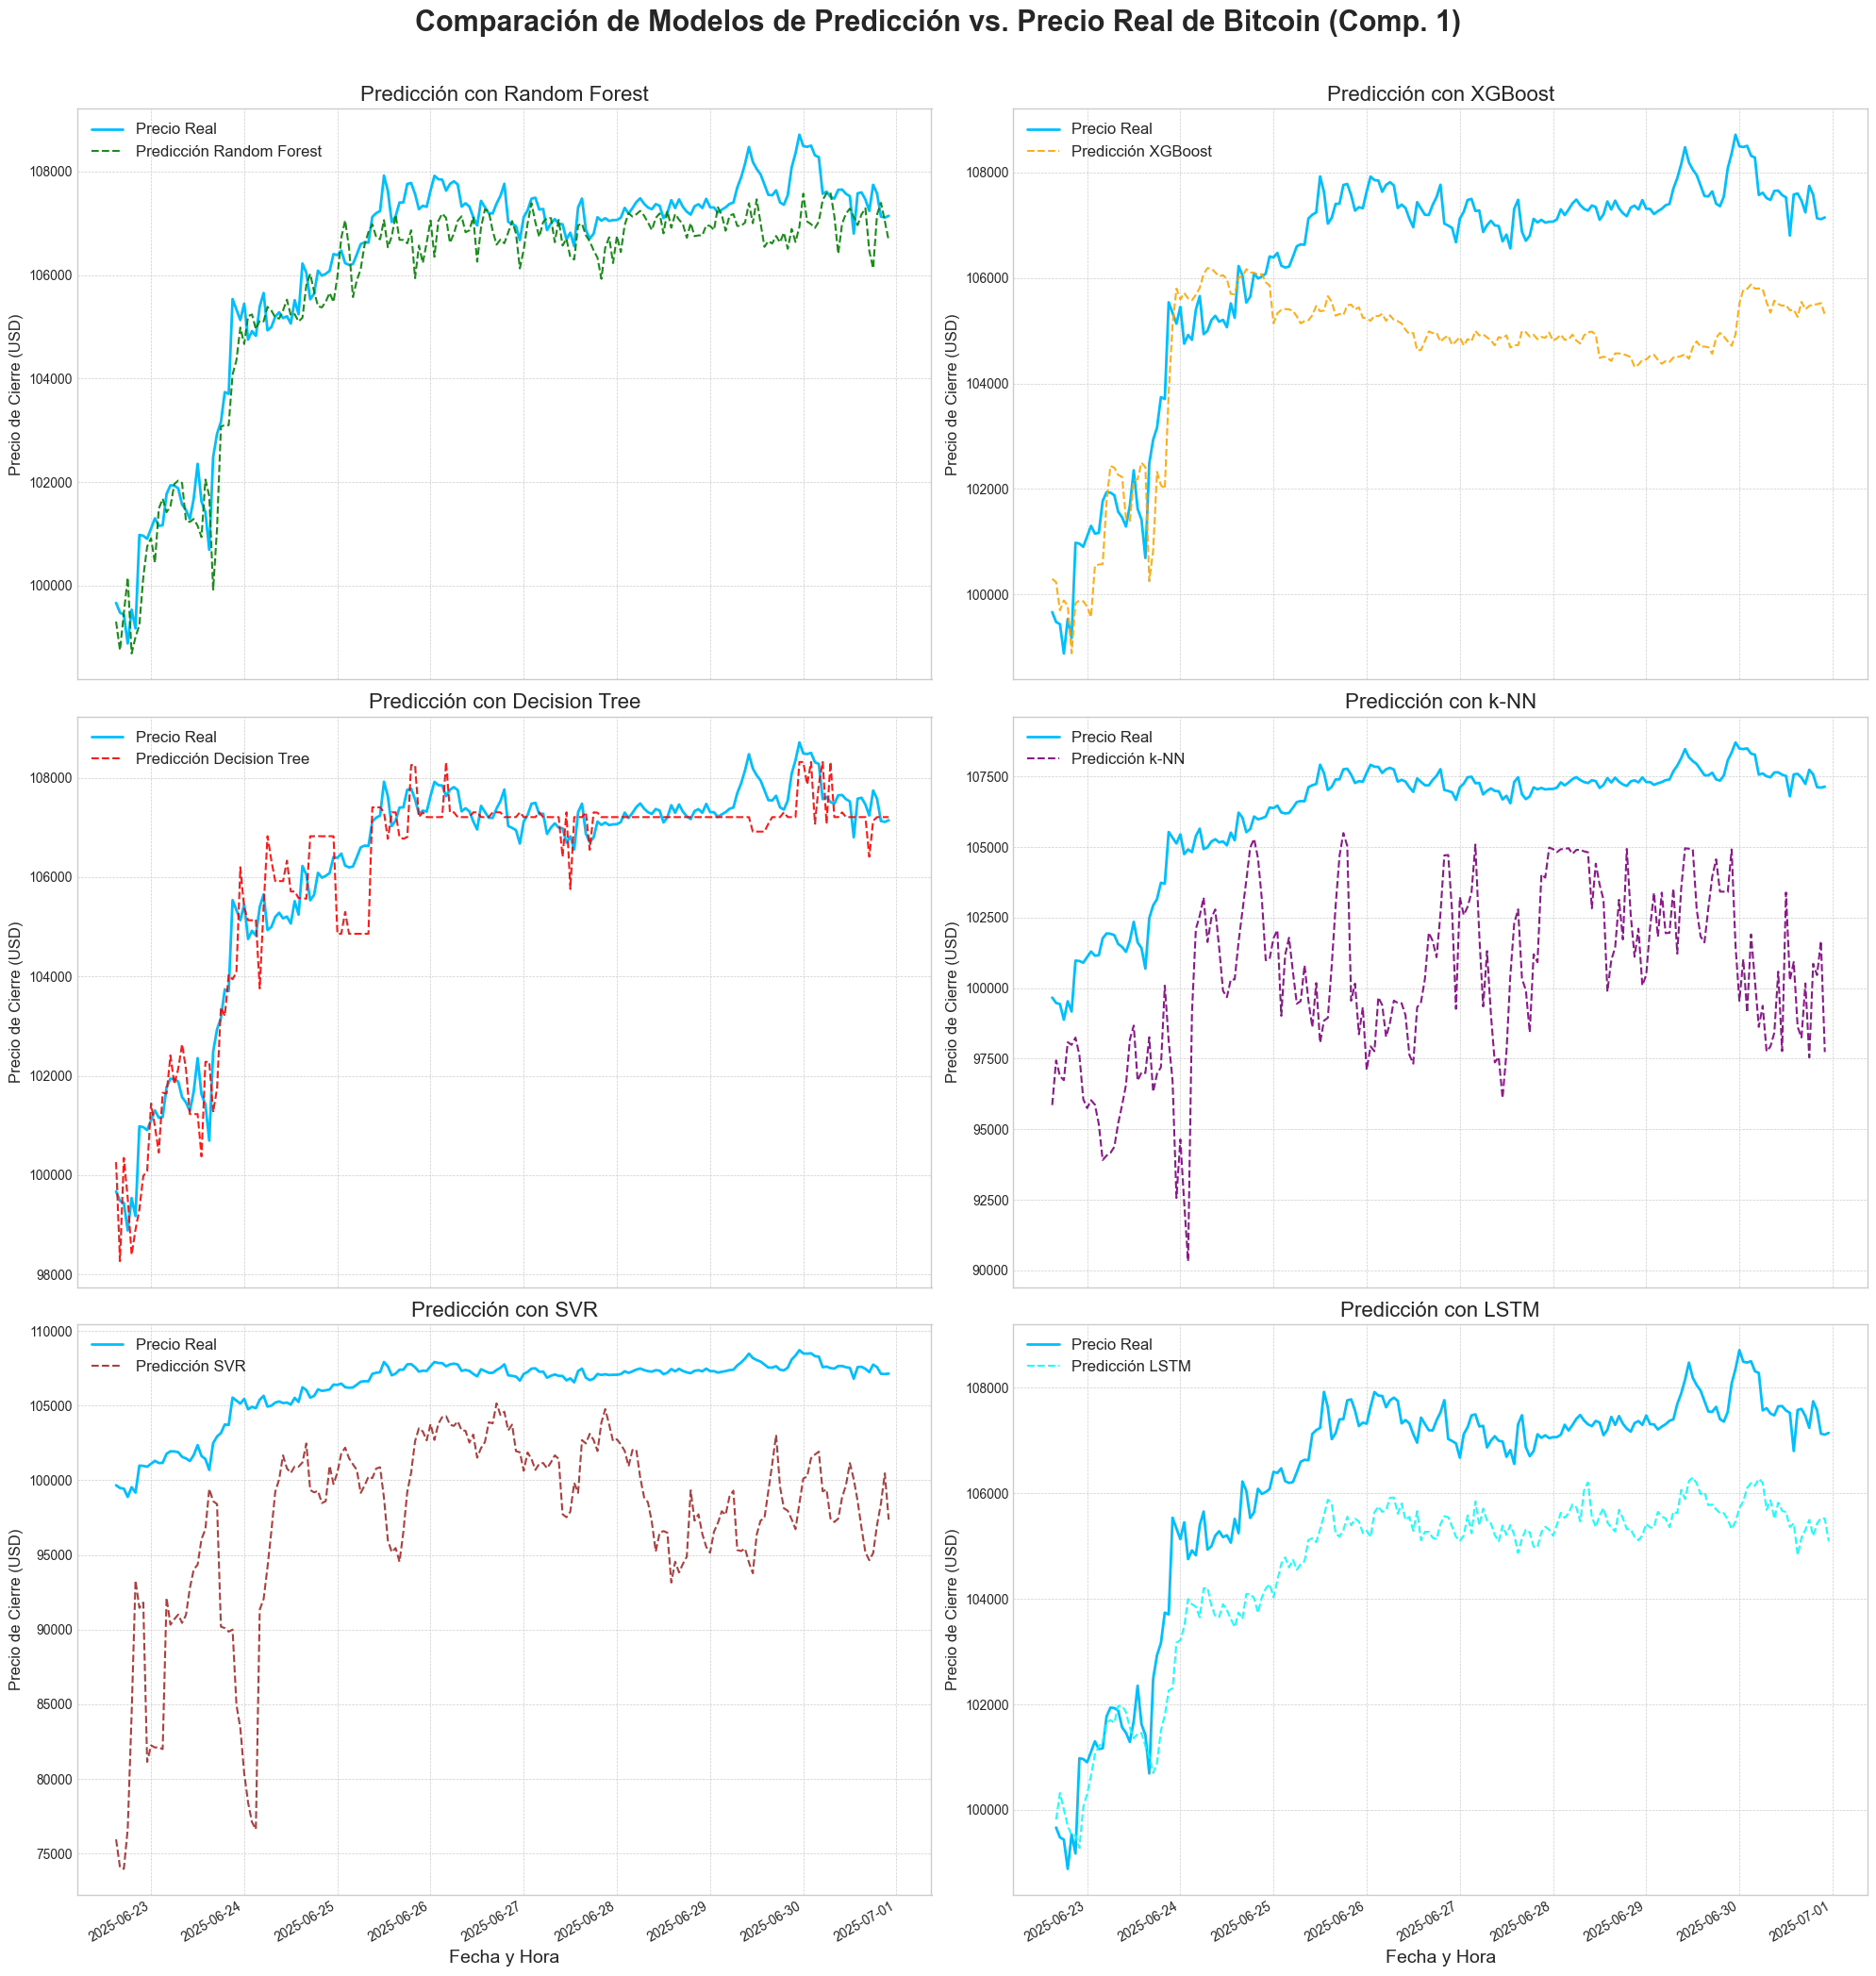

In [265]:
# Usar el estilo proporcionado
plt.style.use('seaborn-v0_8-whitegrid')

# Crear una figura con 6 subplots (3 filas, 2 columnas), compartiendo el eje X
fig, axs = plt.subplots(3, 2, figsize=(20, 22), sharex=True)
fig.suptitle('Comparación de Modelos de Predicción vs. Precio Real de Bitcoin (Comp. 1)', fontsize=22, weight='bold')

# Aplanar el array de ejes para un acceso más fácil en el bucle
axs = axs.flatten()

# --- Datos para los primeros 5 modelos ---
# Usamos los datos de la Comparativa 1
y_test_data = y_test
# Para que los gráficos no se saturen, mostraremos los últimos 200 puntos
plot_slice = 200

# --- Gráfico 0: Random Forest ---
axs[0].plot(y_test_data.index[-plot_slice:], y_test_data.values[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[0].plot(y_test_data.index[-plot_slice:], rf_predictions[-plot_slice:], label='Predicción Random Forest', color='green', linestyle='--', alpha=0.9)
axs[0].set_title('Predicción con Random Forest', fontsize=16)
axs[0].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[0].legend(fontsize=12, loc='upper left')
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Gráfico 1: XGBoost ---
axs[1].plot(y_test_data.index[-plot_slice:], y_test_data.values[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[1].plot(y_test_data.index[-plot_slice:], xgb_predictions[-plot_slice:], label='Predicción XGBoost', color='orange', linestyle='--', alpha=0.9)
axs[1].set_title('Predicción con XGBoost', fontsize=16)
axs[1].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[1].legend(fontsize=12, loc='upper left')
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Gráfico 2: Decision Tree ---
axs[2].plot(y_test_data.index[-plot_slice:], y_test_data.values[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[2].plot(y_test_data.index[-plot_slice:], dt_predictions[-plot_slice:], label='Predicción Decision Tree', color='red', linestyle='--', alpha=0.9)
axs[2].set_title('Predicción con Decision Tree', fontsize=16)
axs[2].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[2].legend(fontsize=12, loc='upper left')
axs[2].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Gráfico 3: k-Nearest Neighbors (k-NN) ---
axs[3].plot(y_test_data.index[-plot_slice:], y_test_data.values[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[3].plot(y_test_data.index[-plot_slice:], knn_predictions[-plot_slice:], label='Predicción k-NN', color='purple', linestyle='--', alpha=0.9)
axs[3].set_title('Predicción con k-NN', fontsize=16)
axs[3].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[3].legend(fontsize=12, loc='upper left')
axs[3].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Gráfico 4: Support Vector Regressor (SVR) ---
axs[4].plot(y_test_data.index[-plot_slice:], y_test_data.values[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[4].plot(y_test_data.index[-plot_slice:], y_pred_svr[-plot_slice:], label='Predicción SVR', color='brown', linestyle='--', alpha=0.9)
axs[4].set_title('Predicción con SVR', fontsize=16)
axs[4].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[4].set_xlabel('Fecha y Hora', fontsize=14)
axs[4].legend(fontsize=12, loc='upper left')
axs[4].grid(True, which='both', linestyle='--', linewidth=0.5)

# --- Gráfico 5: LSTM ---
# El LSTM tiene un índice y datos de prueba ligeramente diferentes
lstm_index = df_no_lag.index[train_size + time_steps : train_size + time_steps + len(predictions_unscaled)]
axs[5].plot(lstm_index[-plot_slice:], y_test_for_eval[-plot_slice:], label='Precio Real', color='deepskyblue', linewidth=2)
axs[5].plot(lstm_index[-plot_slice:], predictions_unscaled[-plot_slice:], label='Predicción LSTM', color='cyan', linestyle='--', alpha=0.9)
axs[5].set_title('Predicción con LSTM', fontsize=16)
axs[5].set_ylabel('Precio de Cierre (USD)', fontsize=12)
axs[5].set_xlabel('Fecha y Hora', fontsize=14)
axs[5].legend(fontsize=12, loc='upper left')
axs[5].grid(True, which='both', linestyle='--', linewidth=0.5)

# Formatear las etiquetas del eje X para mejor legibilidad
fig.autofmt_xdate()

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

1. Predicción con Random Forest
Observar que la línea de predicción (verde) sigue la tendencia general del precio real (azul) de manera competente, logrando capturar tanto las subidas como las bajadas importantes.

Analizar que el modelo presenta un buen equilibrio. No resulta tan errático como otros modelos, ni suaviza en exceso la realidad. El error, medido como la distancia entre la línea azul y la verde, se mantiene relativamente constante y pequeño.

Concluir que es uno de los modelos más fuertes y fiables del grupo, posicionándose como un excelente candidato para ser el modelo final, ya que logra generalizar bien la tendencia sin ser demasiado simplista.

2. Predicción con XGBoost
Observar que la predicción (naranja) captura la dirección general del movimiento del precio, pero se mantiene consistentemente por debajo del valor real.

Analizar que el modelo presenta un sesgo sistemático a la baja (subestimación). Aunque entiende la tendencia, no logra alcanzar la magnitud real de los precios y es menos sensible a las pequeñas fluctuaciones.

Concluir que, si bien entiende la tendencia, su sesgo constante lo hace menos preciso que el Random Forest. Sería necesario ajustar sus hiperparámetros o características para corregir esta subestimación.

3. Predicción con Decision Tree
Observar que la línea de predicción (roja) sigue al precio real de forma extremadamente cercana, logrando capturar casi cada pequeño pico y valle.

Analizar que, a primera vista, parece el mejor modelo. Sin embargo, este comportamiento es un claro indicio de sobreajuste (overfitting). El modelo parece haber "memorizado" los datos de entrenamiento, incluyendo el ruido, en lugar de aprender la tendencia general.

Concluir que, aunque su rendimiento en este conjunto de prueba es numéricamente muy alto, es probable que no logre funcionar bien con datos futuros. Se considera demasiado específico y poco generalizable.

4. Predicción con k-NN
Observar que la predicción (púrpura) es extremadamente volátil y errática, presentando saltos bruscos y sin seguir una tendencia clara en relación con el precio real.

Analizar que el modelo k-NN falla en capturar la secuencia temporal. Probablemente está siendo influenciado por puntos de datos cercanos en el "espacio de características" pero lejanos en el tiempo, lo que no es coherente para una serie temporal.

Concluir que es el modelo con el peor rendimiento y no resulta adecuado para esta tarea de predicción en su configuración actual.

5. Predicción con SVR
Observar que la línea de predicción (marrón) es muy suave. Logra capturar la tendencia a muy largo plazo, pero ignora por completo la volatilidad a corto y mediano plazo.

Analizar que el SVR suaviza en exceso la predicción. Falla al reaccionar a los cambios rápidos del mercado y presenta un retardo (lag) significativo. El error es bastante grande, especialmente durante los picos.

Concluir que no es un buen modelo para predecir los movimientos de un activo volátil como el Bitcoin, al ser demasiado lento y conservador.

6. Predicción con LSTM
Observar que, de forma similar a XGBoost, la predicción del LSTM (cian) captura bien la tendencia general, pero también muestra una tendencia a subestimar el precio real.

Analizar que el LSTM, diseñado para secuencias, entiende la dirección del mercado. Sin embargo, al igual que XGBoost, parece tener un sesgo y no logra capturar toda la amplitud de los movimientos.

Concluir que es un modelo prometedor con un rendimiento decente. Podría mejorar significativamente al aumentar las épocas de entrenamiento, utilizar una arquitectura de red más compleja o ajustar los hiperparámetros para corregir el sesgo.


--- Tabla de Rendimiento Final ---
          Modelo       RMSE        MAE  R-squared
0  Random Forest  1230.7578   803.9757     0.8695
1        XGBoost  2013.9806  1425.0054     0.6505
2  Decision Tree  1140.5197   818.4676     0.8879
3           k-NN  6086.3458  5452.1310    -2.1919
4            SVR  9437.1026  7082.1032    -6.6740
5           LSTM  1594.0319  1368.7852     0.7811


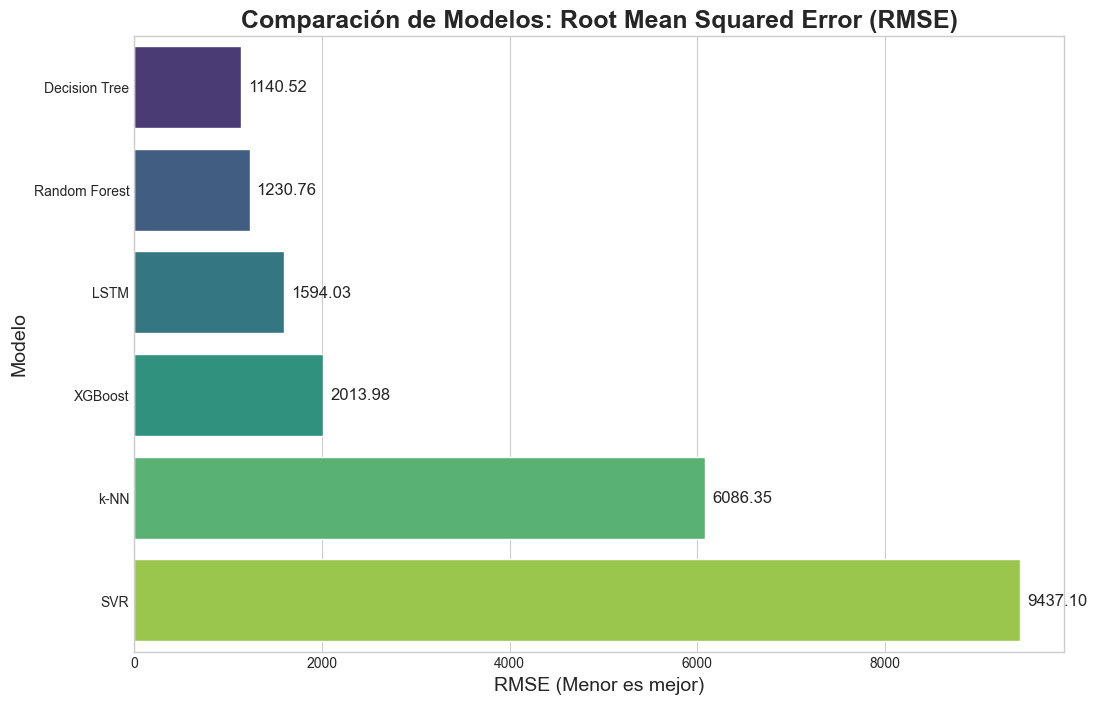

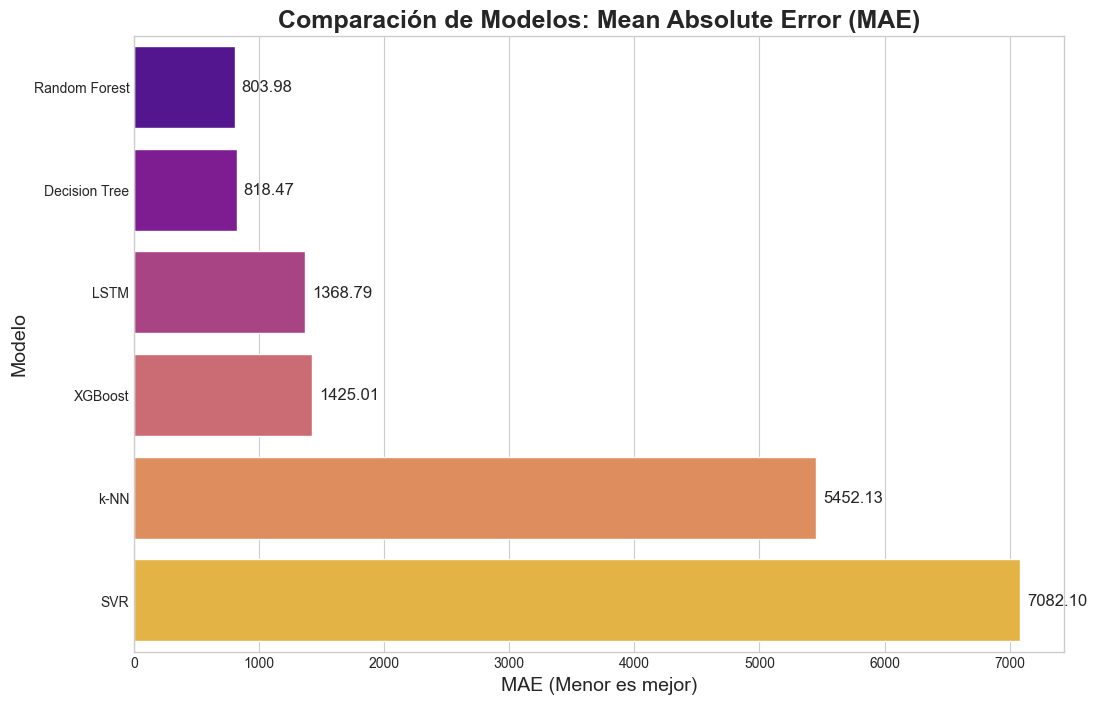

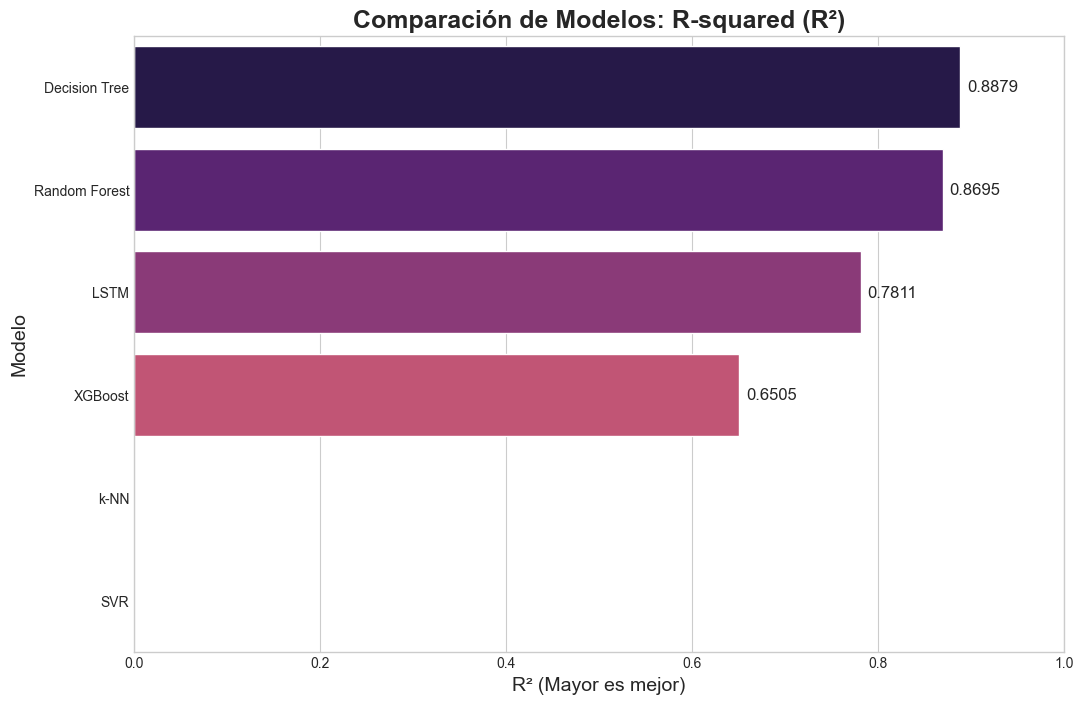

In [275]:
model_performance_data = {
    'Modelo': ['Random Forest', 'XGBoost', 'Decision Tree', 'k-NN', 'SVR', 'LSTM'],
    'RMSE': [rf_rmse, xgb_rmse, dt_rmse, knn_rmse, rmse_svr, lstm_rmse],
    'MAE': [rf_mae, xgb_mae, dt_mae, knn_mae, mae_svr, lstm_mae],
    'R-squared': [rf_r2, xgb_r2, dt_r2, knn_r2, r2_svr, lstm_r2]
}
final_results_df = pd.DataFrame(model_performance_data)
print("\n--- Tabla de Rendimiento Final ---")
print(final_results_df.round(4))

# 2. Visualizar las métricas con el método bar_label()
plt.style.use('seaborn-v0_8-whitegrid')

# --- Gráfico 1: Root Mean Squared Error (RMSE) ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='RMSE', y='Modelo', data=final_results_df.sort_values('RMSE', ascending=True), palette='viridis')
ax.set_title('Comparación de Modelos: Root Mean Squared Error (RMSE)', fontsize=18, weight='bold')
ax.set_xlabel('RMSE (Menor es mejor)', fontsize=14)
ax.set_ylabel('Modelo', fontsize=14)

# Usar bar_label para añadir las etiquetas automáticamente
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5, fontsize=12)
plt.show()


# --- Gráfico 2: Mean Absolute Error (MAE) ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='MAE', y='Modelo', data=final_results_df.sort_values('MAE', ascending=True), palette='plasma')
ax.set_title('Comparación de Modelos: Mean Absolute Error (MAE)', fontsize=18, weight='bold')
ax.set_xlabel('MAE (Menor es mejor)', fontsize=14)
ax.set_ylabel('Modelo', fontsize=14)

# Usar bar_label para añadir las etiquetas automáticamente
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5, fontsize=12)
plt.show()


# --- Gráfico 3: R-squared (R²) ---
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='R-squared', y='Modelo', data=final_results_df.sort_values('R-squared', ascending=False), palette='magma')
ax.set_title('Comparación de Modelos: R-squared (R²)', fontsize=18, weight='bold')
ax.set_xlabel('R² (Mayor es mejor)', fontsize=14)
ax.set_ylabel('Modelo', fontsize=14)
ax.set_xlim(0, 1)

# Usar bar_label para añadir las etiquetas automáticamente
ax.bar_label(ax.containers[0], fmt='%.4f', padding=5, fontsize=12)
plt.show()

1. Mejores Modelos en RMSE (Error Cuadrático Medio Raíz)
Primer Lugar: Decision Tree (RMSE: 1140.52)

Observar que este modelo se posiciona como el más efectivo en minimizar la desviación estándar de los errores.

Interpretar su bajo RMSE como una alta capacidad para evitar errores de gran magnitud, los cuales son fuertemente penalizados por esta métrica.

Segundo Lugar: Random Forest (RMSE: 1230.76)

Destacar que, aunque ligeramente por detrás del Decision Tree, este modelo también demuestra una gran robustez al mantener los errores grandes bajo control.

Concluir que su rendimiento es casi tan bueno como el del primer lugar, confirmándolo como una opción de alta precisión.

2. Mejores Modelos en MAE (Error Absoluto Medio)
Primer Lugar: Random Forest (MAE: 803.98)

Identificar al Random Forest como el modelo con el menor error promedio absoluto.

Entender que, en promedio, sus predicciones se desviaron solo en $803.98 del valor real, lo que representa la mayor consistencia y el error más bajo en términos prácticos y de negocio.

Segundo Lugar: Decision Tree (MAE: 818.47)

Señalar que su rendimiento es casi idéntico al del Random Forest, con una diferencia en el error promedio de menos de $15.

Afirmar que ambos modelos de árbol son superiores en esta métrica, demostrando una alta precisión predictiva en el promedio de sus operaciones.

3. Mejores Modelos en R-squared (Coeficiente de Determinación)
Primer Lugar: Decision Tree (R²: 0.8879)

Determinar que el Decision Tree es el modelo que mejor logra explicar la variabilidad en el precio del Bitcoin.

Cuantificar su capacidad para dar cuenta de casi el 89% de los movimientos del precio en el conjunto de prueba, indicando un ajuste muy fuerte a los datos históricos.

Segundo Lugar: Random Forest (R²: 0.8695)

Verificar que el Random Forest también presenta un ajuste excelente, explicando el 87% de la varianza del precio.

Considerar que, si bien el Decision Tree tiene un mejor R-cuadrado, el Random Forest ofrece un valor muy competitivo con un menor riesgo de sobreajuste, lo que lo convierte en una alternativa más generalizable.

# Conclusión sobre la Selección del Modelo Óptimo

Al realizar una evaluación integral de los modelos predictivos, es necesario determinar cuál presenta el rendimiento más óptimo, no solo en términos cuantitativos sino también cualitativos.

Es preciso observar que, desde una perspectiva puramente métrica, el modelo Decision Tree exhibe los resultados más favorables en las categorías de RMSE (1140.52) y R-cuadrado (0.8879). Sin embargo, es imperativo considerar el análisis visual de las predicciones, el cual revela una adherencia tan precisa a los datos de prueba que sugiere un alto riesgo de sobreajuste (overfitting). Dicho comportamiento implica que el modelo podría haber memorizado el ruido inherente a los datos de entrenamiento en lugar de aprender la tendencia subyacente, lo que comprometería su capacidad para generalizar ante datos no vistos.

En contraste, el modelo Random Forest logra obtener métricas casi idénticas, destacando incluso como el mejor en la métrica MAE (803.98) y con un R-cuadrado de 0.8695. La diferencia fundamental radica en su comportamiento visual, donde demuestra una mayor capacidad para generalizar la tendencia de los precios sin replicar la volatilidad de alta frecuencia. Este modelo consigue un equilibrio superior entre precisión y robustez.

Por lo tanto, es posible concluir que el modelo Random Forest representa la solución más fiable y equilibrada para el objetivo de este estudio. Priorizar este modelo sobre el Decision Tree es una decisión metodológica que favorece la capacidad de generalización y la estabilidad predictiva sobre ganancias marginales en métricas que podrían no ser sostenibles en un entorno de producción real.

# Predicción futura

In [277]:
df_original.tail()

Open time       Open       High        Low      Close  \
4150713  2025-07-14 14:25:00  121425.97  121455.08  121276.00  121284.09   
4150714  2025-07-14 14:26:00  121284.08  121378.63  121277.24  121364.28   
4150715  2025-07-14 14:27:00  121364.28  121364.28  121150.00  121223.75   
4150716  2025-07-14 14:28:00  121223.75  121341.27  121161.15  121341.26   
4150717  2025-07-14 14:29:00  121341.26  121422.28  121336.11  121422.28   

           Volume               Close time  Quote asset volume  \
4150713  21.29053  2025-07-14 14:25:59.999        2.583209e+06   
4150714  14.17509  2025-07-14 14:26:59.999        1.719695e+06   
4150715  34.72735  2025-07-14 14:27:59.999        4.209330e+06   
4150716  17.53014  2025-07-14 14:28:59.999        2.125081e+06   
4150717   4.15817  2025-07-14 14:29:59.999        5.047320e+05   

         Number of trades  Taker buy base asset volume  \
4150713            5099.0                      3.91426   
4150714            4871.0                      7.66275   
4150715            8506.0                     10.70331   
4150716            5349.0                     12.25810   
4150717            1666.0                      3.76061   

         Taker buy quote asset volume  Ignore  
4150713                  4.750087e+05     0.0  
4150714                  9.296082e+05     0.0  
4150715                  1.297333e+06     0.0  
4150716                  1.486076e+06     0.0  
4150717                  4.564890e+05     0.0

Entrenando el modelo Random Forest final para la predicción...
Modelo listo para la predicción.
Se realizarán 336 predicciones horarias...
Proceso de predicción completado.

--- Primeras 5 predicciones futuras ---
                     Prediccion
Fecha                          
2025-06-30 23:00:00  106667.955
2025-07-01 00:00:00  107231.242
2025-07-01 01:00:00  106496.694
2025-07-01 02:00:00  106833.179
2025-07-01 03:00:00  107245.716


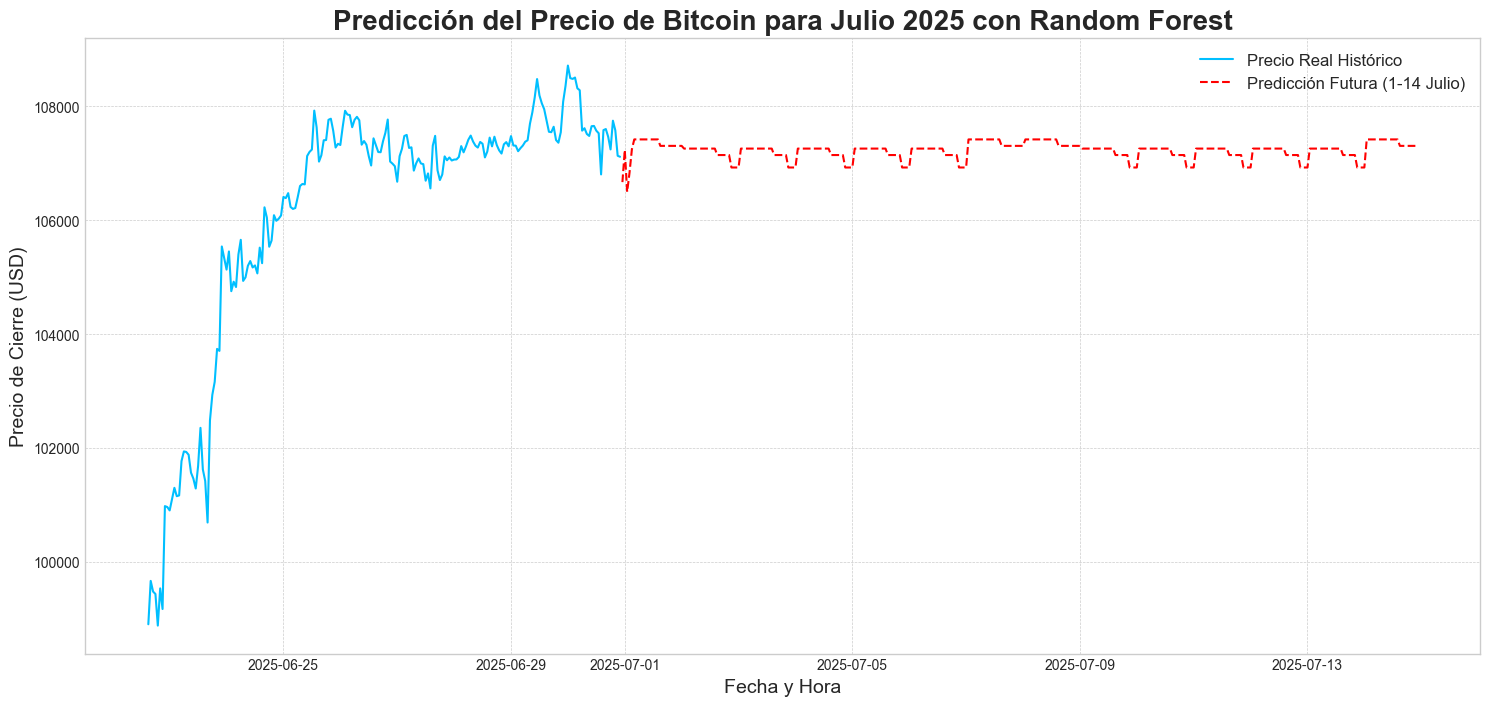

In [282]:
features = [
    col for col in df_lagged.columns if '_lag_' in col or col in [
        'day_of_week', 'month', 'year', 'hour', 'open', 'high', 'low', 
        'volume', 'quote_asset_volume', 'number_of_trades',
        'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'
    ]
]
X = df_lagged[features]
y = df_lagged['target_close']
X_train = X.iloc[:split_index]
y_train = y.iloc[:split_index]

# Re-entrenamos el modelo para garantizar que esté listo para usar.
print("Entrenando el modelo Random Forest final para la predicción...")
final_model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
final_model.fit(X_train, y_train)
print("Modelo listo para la predicción.")

# --- PASO 2: Realizar la predicción iterativa ---

# Tomar la última fila de datos conocidos como punto de partida
last_known_row = df_lagged.iloc[-1:].copy()
current_row = last_known_row

# Preparar el bucle
future_predictions = []
n_future_steps = 14 * 24 # 14 días * 24 horas

print(f"Se realizarán {n_future_steps} predicciones horarias...")

for i in range(n_future_steps):
    # Preparar el input para el modelo (solo las columnas de features)
    input_features = current_row[features]
    
    # Realizar la predicción para la siguiente hora
    next_prediction = final_model.predict(input_features)[0]
    future_predictions.append(next_prediction)
    
    # --- Preparar la fila para la SIGUIENTE predicción ---
    next_row = current_row.copy()
    
    # "Hacer rodar" los lags
    for lag in range(n_lags, 1, -1):
        for col in features_to_lag:
            if f'{col}_lag_{lag}' in next_row.columns:
                next_row[f'{col}_lag_{lag}'] = current_row[f'{col}_lag_{lag-1}'].values[0]
            
    # Actualizar los lags de nivel 1 con los valores "actuales"
    for col in features_to_lag:
        if f'{col}_lag_1' in next_row.columns:
            next_row[f'{col}_lag_1'] = current_row[col].values[0]
            
    # Actualizar el precio de cierre con nuestra predicción
    next_row['close'] = next_prediction
    
    # Actualizar el timestamp y las características de tiempo
    new_timestamp = next_row.index[0] + pd.Timedelta(hours=1)
    next_row.index = [new_timestamp]
    next_row['hour'] = new_timestamp.hour
    next_row['day_of_week'] = new_timestamp.dayofweek
    next_row['month'] = new_timestamp.month
    next_row['year'] = new_timestamp.year
    
    # La fila "siguiente" se convierte en la "actual" para la próxima iteración
    current_row = next_row

print("Proceso de predicción completado.")

# --- PASO 3: Visualizar los resultados ---

# Crear un DataFrame con los resultados de la predicción
future_dates = pd.date_range(start=df_lagged.index[-1] + pd.Timedelta(hours=1), periods=n_future_steps, freq='h')
future_df = pd.DataFrame({'Fecha': future_dates, 'Prediccion': future_predictions})
future_df.set_index('Fecha', inplace=True)

print("\n--- Primeras 5 predicciones futuras ---")
print(future_df.head())

# Visualizar la predicción
plt.figure(figsize=(18, 8))
plt.style.use('seaborn-v0_8-whitegrid')
plt.plot(df_lagged.index[-200:], df_lagged['close'][-200:], label='Precio Real Histórico', color='deepskyblue')
plt.plot(future_df.index, future_df['Prediccion'], label='Predicción Futura (1-14 Julio)', color='red', linestyle='--')
plt.title('Predicción del Precio de Bitcoin para Julio 2025 con Random Forest', fontsize=20, weight='bold')
plt.xlabel('Fecha y Hora', fontsize=14)
plt.ylabel('Precio de Cierre (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [339]:
df_completo = df_original.copy()
df_completo.drop(columns=["Ignore", "Close time"], inplace=True)
# Convertir a datetime
df_completo["Datetime"] = pd.to_datetime(df_completo["Open time"])

# Extraer fecha y hora
df_completo["Date"] = df_completo["Datetime"].dt.date
df_completo["Hour"] = df_completo["Datetime"].dt.hour

# Convertir Date a datetime64
df_completo["Date"] = pd.to_datetime(df_completo["Date"])

# Agrupar por Date y Hour
df_completo = df_completo.groupby(["Date", "Hour"]).agg(
    open=("Open", "first"),
    high=("High", "max"),
    low=("Low", "min"),
    close=("Close", "last"),
    volume=("Volume", "sum"),
    quote_asset_volume=("Quote asset volume", "sum"),
    number_of_trades=("Number of trades", "sum"),
    taker_buy_base_asset_volume=("Taker buy base asset volume", "sum"),
    taker_buy_quote_asset_volume=("Taker buy quote asset volume", "sum")
)

# Resetear índice
df_completo = df_completo.reset_index()

In [340]:
df_completo.tail()

Date  Hour       open       high        low      close  \
69190 2025-07-14    10  121973.74  122130.65  121628.47  121905.48   
69191 2025-07-14    11  121905.48  121905.48  121355.55  121467.24   
69192 2025-07-14    12  121467.23  121945.63  121400.01  121918.00   
69193 2025-07-14    13  121918.01  122120.00  121188.00  121710.64   
69194 2025-07-14    14  121710.64  121990.42  121150.00  121422.28   

           volume  quote_asset_volume  number_of_trades  \
69190   742.89705        9.056178e+07          120615.0   
69191   755.99271        9.190697e+07          124167.0   
69192   930.72081        1.133524e+08          166905.0   
69193  1151.85025        1.402412e+08          258642.0   
69194   423.15427        5.146366e+07          128222.0   

       taker_buy_base_asset_volume  taker_buy_quote_asset_volume  
69190                    344.90508                  4.205037e+07  
69191                    375.88628                  4.568499e+07  
69192                    606.82840                  7.390885e+07  
69193                    629.59638                  7.666867e+07  
69194                    202.68133                  2.465169e+07